In [1]:
# Librerias

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import chain
from scipy.stats import ttest_ind
import seaborn as sns

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder

from lightgbm import LGBMRegressor, LGBMClassifier
from xgboost import XGBRegressor, XGBClassifier

from causalml.inference.meta import BaseSRegressor, BaseTRegressor, BaseXRegressor, BaseRRegressor
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.inference.tree import UpliftRandomForestClassifier, UpliftTreeClassifier
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot
from causalml.dataset.regression import synthetic_data
from causalml.dataset import *
from causalml.feature_selection.filters import FilterSelect
from causalml.metrics import *

from dowhy import CausalModel

from sklift.metrics import uplift_at_k, uplift_auc_score, qini_auc_score, weighted_average_uplift
from sklift.viz import plot_uplift_preds, plot_uplift_by_percentile
from sklift.models import SoloModel, TwoModels

from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

from pymatch.Matcher import Matcher

from econml.metalearners import TLearner, SLearner, XLearner, DomainAdaptationLearner

from IPython.display import Image

import shap

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'  # for lightgbm to work

pd.set_option('display.max_columns', None)

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# CRISP-DM

**CR**oss **I**ndustry **S**tandard **P**rocess for **D**ata **M**ining (CRISP-DM)

![image.png](attachment:image.png)

    1.- Business understanding – ¿Qué necesita el negocio?
    2.- Data understanding – ¿Qué datos tenemos/necesitamos? ¿Está limpio?
    3.- Data preparation – ¿Cómo organizamos los datos para el modelado?
    4.- Modeling – ¿Qué técnicas de modelado debemos aplicar?
    5.- Evaluation – ¿Qué modelo cumple mejor con los objetivos comerciales?
    6.- Deployment – ¿Cómo acceden las partes interesadas a los resultados?

## Business understanding 

**Cualquier buen proyecto comienza con una comprensión profunda de las necesidades del cliente.** Los proyectos de minería de datos no son una excepción y CRISP-DM lo reconoce.

La fase de comprensión empresarial se centra en la comprensión de los objetivos y requisitos del proyecto. Aparte de la tercera tarea, las otras tres tareas en esta fase son actividades fundamentales de gestión de proyectos que son universales para la mayoría de los proyectos:

### 1.- Determine los objetivos comerciales: 

Primero debe "comprender a fondo, desde una perspectiva comercial, lo que el cliente realmente quiere lograr". ( Guía CRISP-DM ) y luego definir los criterios de éxito empresarial.

**Respuesta:** 

Evaluar de manera robusta el efecto heterogéneo del tratamiento de los experimentos realizados por el equipo de FFP de LATAM Airlines utilizando técnicas de Causal Machine Learning. (código modularizado, el cuál será utilizado al equipo para realizar inferencia causal)

1. **Recomendar ajustes y parámetros del diseño experimental.** Definición de métrica objetivo relevante para el negocio, diseño de componentes esenciales del experimento, cálculo de baseline, ejecución de A/B test en datos históricos, y comprensión de las restricciones del negocio.

2. **Medir el efecto promedio del tratamiento de manera robusta.** Aplicación de metodologías adecuadas para la inferencia en base utilizando los datos recolectados del experimento. Validación de estimación de varianza ejecutando A/B test.

3. **Medir efectos heterogéneos en el tratamiento según características de clientes y campañas**: Realizar un Uplift.

4. **Optimizar campañas usando modelo analizado y evaluar impacto en el negocio**: Realizar un Uplift para cada tipo de campaña (Recommender, Accrual o Redemtion) y ver cual genera un mayor uplift.

4. **Obtener ATE de algoritmo, ATE de mail y ATE de algoritmo y mail**: ATE de algoritmo se realiza comparando grupo con score vs grupo sin score de jarvis, ATE de mail se realiza con tratamiento (tipo de campaña) vs control, y `ATE de algoritmo y mail se calcula............`
    
### 2.- Evaluar la situación: 

Determinar la disponibilidad de recursos, los requisitos del proyecto, evaluar los riesgos y contingencias y realizar un análisis de costo-beneficio.

**Respuesta:** 

1. **Disponibilidad de recursos**:

2. **Requisitos del proyecto**:

3. **Evaluar los riesgos y contingencias**:

4. **Análisis de costo-beneficio**:


### 3.- Determine los objetivos de la minería de datos: 

Además de definir los objetivos comerciales, también debe definir cómo se ve el éxito desde una perspectiva técnica de minería de datos.

**Respuesta:**

### 4.- Producir plan de proyecto: 

Seleccione tecnologías y herramientas, y defina planes detallados para cada fase del proyecto.

**Respuesta:**

## Data understanding

La siguiente es la fase de *comprensión de datos*. Además de la base de *Business Understanding*, impulsa el enfoque para identificar, recopilar y analizar los conjuntos de datos que pueden ayudarlo a lograr los objetivos del proyecto. Esta fase también tiene cuatro tareas:

### 1. - Recopilar datos iniciales: 

Adquiera los datos necesarios y (si es necesario) cárguelos en su herramienta de análisis.

**Respuesta**

In [2]:
df_Latam = pd.read_csv('data/Jarvis_CampaignData_Sample.csv')
df_Latam.drop(columns='Unnamed: 0', inplace=True)
df_Latam = df_Latam.rename(columns={'pre_pontos_LTM': 'pre_puntos_LTM',
                                    'post_pontos_LTM': 'post_puntos_LTM'})
df_Latam.sample(5)

CAMPAIGN_NAME  campaign_id campaign_date_start  \
57357   20230605_EMAIL_HIBRIDO_JARVIS_JUN_23          NaN          2023-06-05   
148310  20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   
126891  20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   
166526  20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   
207521  20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   

       campaign_date_end  audience_id        grupo  learning_group_flg  \
57357         2023-06-05          345      accrual                   0   
148310        2023-06-05          345  recommender                   0   
126891        2023-06-05          345  recommender                   0   
166526        2023-06-05          345  recommender                   0   
207521        2023-06-05          345  recommender                   0   

       grupo_augmented   open_date  open_flag click_date  click_flag  \
57357          accrual         NaN          0        NaN           0   
148310     recommender         NaN          0        NaN           0   
126891     recommender         NaN          0        NaN           0   
166526     recommender  2023-06-05          1        NaN           0   
207521     recommender         NaN          0        NaN           0   

       promotion_name promotion_type_name  \
57357     Recomendada          jarvis 1.5   
148310    Recomendada          jarvis 1.5   
126891    Recomendada          jarvis 1.5   
166526    Recomendada          jarvis 1.5   
207521    Recomendada          jarvis 1.5   

                                          RECOMMENDATIONS  \
57357   {"AC1":"ABASTECE AI","AC2":"CAIXA ECONOMICA FE...   
148310  {"AC1":"ABASTECE AI","AC2":"B2W","AC3":"BOOKIN...   
126891  {"AC1":"ITERPEC","AC2":"BOOKING","AC3":"B2W","...   
166526  {"AC1":"ABASTECE AI","AC2":"CAIXA ECONOMICA FE...   
207521  {"AC1":"BANCO ITAU","AC2":"ABASTECE AI","AC3":...   

                                           hashed_ffp_num product GRUPO  \
57357   f5d7d849c57b98477bdca75027a06785b525420dc3ec1f...     NaN   NaN   
148310  5397ed613c084a34ebbbbb1bce6c76f6190af864ed034e...     NaN   NaN   
126891  9a7ac2e21c727a9a49ef95e687327d2c6c680b6de1c828...     NaN   NaN   
166526  65c6354c713b25ba0cfad837c4460703150fd5585b025b...     NaN   NaN   
207521  8d07d2be4666018496d81a7a5076f18694fedbc8fb396e...     NaN   NaN   

        post_open_flag  post_click_flag  post_conversion_flag  post_n_trx  \
57357              NaN              NaN                   NaN         NaN   
148310             NaN              NaN                   NaN         NaN   
126891             NaN              NaN                   NaN         NaN   
166526             NaN              NaN                   NaN         NaN   
207521             NaN              NaN                   NaN         NaN   

        post_USD  post_income_amt  post_puntos_LTM  pre_open_flag  \
57357        NaN              NaN              NaN            NaN   
148310       NaN              NaN              NaN            NaN   
126891       NaN              NaN              NaN            NaN   
166526       NaN              NaN              NaN            NaN   
207521       NaN              NaN              NaN            NaN   

        pre_click_flag  pre_conversion_flag  pre_n_trx  pre_USD  \
57357              NaN                  NaN        NaN      NaN   
148310             NaN                  NaN        NaN      NaN   
126891             NaN                  NaN        NaN      NaN   
166526             NaN                  NaN        NaN      NaN   
207521             NaN                  NaN        NaN      NaN   

        pre_income_amt  pre_puntos_LTM type  
57357              NaN             NaN  NaN  
148310             NaN             NaN  NaN  
126891             NaN             NaN  NaN  
166526             NaN             NaN  NaN  
207521             NaN             NaN  NaN

### 2.- Describa los datos: 

Examine los datos y documente sus propiedades superficiales, como el formato de los datos, la cantidad de registros o las identidades de los campos.

#### Cantidad de registros

In [3]:
df_Latam.shape

#### Identidades de los campos

In [4]:
print("Valores únicos:\n")

menos15 = []

mas15 = []

for i in df_Latam.columns:
    if df_Latam[i].nunique() <= 15:
        menos15.append(i)
        print(f"{i}:\n")
        print(f"{df_Latam[i].value_counts()}\n")
        print(f"Suma de los valores: {sum(df_Latam[i].value_counts())}\n")
        print("#################################\n")
    else:
        mas15.append(i)

Valores únicos:

CAMPAIGN_NAME:

20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    209891
Name: CAMPAIGN_NAME, dtype: int64

Suma de los valores: 209891

#################################

campaign_id:

5867194.0    122112
5867190.0     56984
5867185.0      7999
5867188.0         8
5867588.0         8
5867600.0         4
5867181.0         3
5867138.0         2
5867595.0         2
5867129.0         2
5867186.0         2
5867598.0         1
Name: campaign_id, dtype: int64

Suma de los valores: 187127

#################################

campaign_date_start:

2023-06-05    209891
Name: campaign_date_start, dtype: int64

Suma de los valores: 209891

#################################

campaign_date_end:

2023-06-05    209891
Name: campaign_date_end, dtype: int64

Suma de los valores: 209891

#################################

audience_id:

345    209891
Name: audience_id, dtype: int64

Suma de los valores: 209891

#################################

grupo:

recommender    132098
accrual         61962
r

In [5]:
print('Posee menos de 15 valores únicos:')
print(menos15)
print('\n###########################################################################\n')
print('Posee más de 15 valores únicos:')
print(mas15)

Posee menos de 15 valores únicos:
['CAMPAIGN_NAME', 'campaign_id', 'campaign_date_start', 'campaign_date_end', 'audience_id', 'grupo', 'learning_group_flg', 'grupo_augmented', 'open_flag', 'click_flag', 'promotion_name', 'promotion_type_name', 'product', 'GRUPO', 'post_open_flag', 'post_click_flag', 'post_conversion_flag', 'pre_open_flag', 'pre_click_flag', 'pre_conversion_flag', 'type']

###########################################################################

Posee más de 15 valores únicos:
['open_date', 'click_date', 'RECOMMENDATIONS', 'hashed_ffp_num', 'post_n_trx', 'post_USD', 'post_income_amt', 'post_puntos_LTM', 'pre_n_trx', 'pre_USD', 'pre_income_amt', 'pre_puntos_LTM']


In [6]:
df_Latam['open_date']

0         2023-06-12
1         2023-06-05
2                NaN
3                NaN
4         2023-06-06
             ...    
209886           NaN
209887    2023-06-05
209888           NaN
209889    2023-06-06
209890           NaN
Name: open_date, Length: 209891, dtype: object

In [7]:
df_Latam['campaign_date_start'] = pd.to_datetime(df_Latam['campaign_date_start'])
df_Latam['campaign_date_end'] = pd.to_datetime(df_Latam['campaign_date_end'])

df_Latam['open_date'] = pd.to_datetime(df_Latam['open_date'])
df_Latam['click_date'] = pd.to_datetime(df_Latam['click_date'])

df_Latam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209891 entries, 0 to 209890
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   CAMPAIGN_NAME         209891 non-null  object        
 1   campaign_id           187127 non-null  float64       
 2   campaign_date_start   209891 non-null  datetime64[ns]
 3   campaign_date_end     209891 non-null  datetime64[ns]
 4   audience_id           209891 non-null  int64         
 5   grupo                 209891 non-null  object        
 6   learning_group_flg    209891 non-null  int64         
 7   grupo_augmented       209891 non-null  object        
 8   open_date             82083 non-null   datetime64[ns]
 9   open_flag             209891 non-null  int64         
 10  click_date            3816 non-null    datetime64[ns]
 11  click_flag            209891 non-null  int64         
 12  promotion_name        209891 non-null  object        
 13 

In [8]:
df_Latam['open_date']

0        2023-06-12
1        2023-06-05
2               NaT
3               NaT
4        2023-06-06
            ...    
209886          NaT
209887   2023-06-05
209888          NaT
209889   2023-06-06
209890          NaT
Name: open_date, Length: 209891, dtype: datetime64[ns]

# **`Análisis de cada variable`**

**Eliminar variables innecesarias**

In [9]:
df_Latam_clean = df_Latam.drop(columns=['CAMPAIGN_NAME', 'campaign_id', 'campaign_date_start', 'campaign_date_end',
                                       'audience_id', 'promotion_name', 'promotion_type_name', 'RECOMMENDATIONS',
                                       'hashed_ffp_num', 'GRUPO', 'type', 'grupo_augmented'])

In [10]:
df_Latam_clean.columns

Index(['grupo', 'learning_group_flg', 'open_date', 'open_flag', 'click_date',
       'click_flag', 'product', 'post_open_flag', 'post_click_flag',
       'post_conversion_flag', 'post_n_trx', 'post_USD', 'post_income_amt',
       'post_puntos_LTM', 'pre_open_flag', 'pre_click_flag',
       'pre_conversion_flag', 'pre_n_trx', 'pre_USD', 'pre_income_amt',
       'pre_puntos_LTM'],
      dtype='object')

In [11]:
df_Latam_clean

grupo  learning_group_flg  open_date  open_flag click_date  \
0       recommender                   0 2023-06-12          1        NaT   
1       recommender                   0 2023-06-05          1        NaT   
2       recommender                   0        NaT          0        NaT   
3       recommender                   0        NaT          0        NaT   
4       recommender                   0 2023-06-06          1        NaT   
...             ...                 ...        ...        ...        ...   
209886  recommender                   0        NaT          0        NaT   
209887  recommender                   0 2023-06-05          1        NaT   
209888  recommender                   0        NaT          0        NaT   
209889  recommender                   0 2023-06-06          1        NaT   
209890  recommender                   0        NaT          0        NaT   

        click_flag product  post_open_flag  post_click_flag  \
0                0     NaN             NaN              NaN   
1                0     NaN             NaN              NaN   
2                0     NaN             NaN              NaN   
3                0     NaN             NaN              NaN   
4                0     NaN             NaN              NaN   
...            ...     ...             ...              ...   
209886           0     NaN             NaN              NaN   
209887           0     ALF             1.0              0.0   
209888           0     NaN             NaN              NaN   
209889           0     NaN             NaN              NaN   
209890           0     NaN             NaN              NaN   

        post_conversion_flag  post_n_trx  post_USD  post_income_amt  \
0                        NaN         NaN       NaN              NaN   
1                        NaN         NaN       NaN              NaN   
2                        NaN         NaN       NaN              NaN   
3                        NaN         NaN       NaN              NaN   
4                        NaN         NaN       NaN              NaN   
...                      ...         ...       ...              ...   
209886                   NaN         NaN       NaN              NaN   
209887                   1.0         1.0  149.2263         149.2263   
209888                   NaN         NaN       NaN              NaN   
209889                   NaN         NaN       NaN              NaN   
209890                   NaN         NaN       NaN              NaN   

        post_puntos_LTM  pre_open_flag  pre_click_flag  pre_conversion_flag  \
0                   NaN            NaN             NaN                  NaN   
1                   NaN            NaN             NaN                  NaN   
2                   NaN            NaN             NaN                  NaN   
3                   NaN            NaN             NaN                  NaN   
4                   NaN            NaN             NaN                  NaN   
...                 ...            ...             ...                  ...   
209886              NaN            NaN             NaN                  NaN   
209887          23000.0            1.0             0.0                  1.0   
209888              NaN            NaN             NaN                  NaN   
209889              NaN            NaN             NaN                  NaN   
209890              NaN            NaN             NaN                  NaN   

        pre_n_trx  pre_USD  pre_income_amt  pre_puntos_LTM  
0             NaN      NaN             NaN             NaN  
1             NaN      NaN             NaN             NaN  
2             NaN      NaN             NaN             NaN  
3             NaN      NaN             NaN             NaN  
4             NaN      NaN             NaN             NaN  
...           ...      ...             ...             ...  
209886        NaN      NaN             NaN             NaN  
209887        1.0  97.3215         97.3215         150

In [12]:
df_Latam_clean.query("post_conversion_flag ==  1")

grupo  learning_group_flg  open_date  open_flag click_date  \
26      recommender                   0 2023-06-06          1        NaT   
116         control                   0        NaT          0        NaT   
118     recommender                   0        NaT          0        NaT   
134     recommender                   0        NaT          0        NaT   
176     recommender                   0 2023-06-05          1        NaT   
...             ...                 ...        ...        ...        ...   
209839  recommender                   0 2023-06-05          1        NaT   
209853  recommender                   0        NaT          0        NaT   
209857  recommender                   0        NaT          0        NaT   
209873  recommender                   0 2023-06-06          1        NaT   
209887  recommender                   0 2023-06-05          1        NaT   

        click_flag product  post_open_flag  post_click_flag  \
26               0      CA             1.0              0.0   
116              0      CA             0.0              0.0   
118              0     ALC             0.0              0.0   
134              0     ALC             0.0              0.0   
176              0     ALC             1.0              0.0   
...            ...     ...             ...              ...   
209839           0     ALC             1.0              0.0   
209853           0     ALC             0.0              0.0   
209857           0     ALC             0.0              0.0   
209873           0     ALC             1.0              0.0   
209887           0     ALF             1.0              0.0   

        post_conversion_flag  post_n_trx    post_USD  post_income_amt  \
26                       1.0         1.0   55.398528         291.5712   
116                      1.0         1.0   85.658688         450.8352   
118                      1.0         2.0         NaN              NaN   
134                      1.0         1.0         NaN              NaN   
176                      1.0         1.0         NaN              NaN   
...                      ...         ...         ...              ...   
209839                   1.0         2.0         NaN              NaN   
209853                   1.0         2.0         NaN              NaN   
209857                   1.0         1.0   39.505179         188.8150   
209873                   1.0         1.0         NaN              NaN   
209887                   1.0         1.0  149.226300         149.2263   

        post_puntos_LTM  pre_open_flag  pre_click_flag  pre_conversion_flag  \
26                  0.0            1.0             0.0                  1.0   
116                 0.0            0.0             0.0                  0.0   
118              4966.0            0.0             0.0                  1.0   
134              1107.0            0.0             0.0                  1.0   
176              2450.0            1.0             0.0                  1.0   
...                 ...            ...             ...                  ...   
209839            567.0            1.0             0.0                  1.0   
209853           2821.0            0.0             0.0                  1.0   
209857           5000.0            0.0             0.0                  1.0   
209873            710.0            1.0             0.0                  1.0   
209887          23000.0            1.0             0.0                  1.0   

        pre_n_trx     pre_USD  pre_income_amt  pre_puntos_LTM  
26            2.0  529.432416       2786.4864             0.0  
116           0.0    0.000000          0.0000             0.0  
118           8.0    0.000000          0.0000         15503.0  
134          24.0    0.000000          0.0000         36829.0  
176           3.0    0.000000          0.0000          8838.0  
...           ...         ...             ...             ...  
209839        7.0    0.000000          0.0000          2264.0  
209853

In [13]:
df_Latam_clean.query("post_conversion_flag ==  0")

Empty DataFrame
Columns: [grupo, learning_group_flg, open_date, open_flag, click_date, click_flag, product, post_open_flag, post_click_flag, post_conversion_flag, post_n_trx, post_USD, post_income_amt, post_puntos_LTM, pre_open_flag, pre_click_flag, pre_conversion_flag, pre_n_trx, pre_USD, pre_income_amt, pre_puntos_LTM]
Index: []

In [14]:
print(df_Latam_clean.shape)
print(f'\nCantidad de valores nulos:\n\n{df_Latam_clean.isnull().sum()}')

(209891, 21)

Cantidad de valores nulos:

grupo                        0
learning_group_flg           0
open_date               127808
open_flag                    0
click_date              206075
click_flag                   0
product                 189784
post_open_flag          189784
post_click_flag         189784
post_conversion_flag    189784
post_n_trx              189784
post_USD                199365
post_income_amt         199365
post_puntos_LTM         189784
pre_open_flag           189784
pre_click_flag          189784
pre_conversion_flag     189784
pre_n_trx               189784
pre_USD                 189784
pre_income_amt          189784
pre_puntos_LTM          189784
dtype: int64


## Campaña

### grupo

In [15]:
df_Latam_clean.grupo.value_counts()

recommender    132098
accrual         61962
redemption       8621
control          7210
Name: grupo, dtype: int64

In [16]:
df_Latam_clean.query("post_conversion_flag ==  1").grupo.value_counts()

recommender    14731
accrual         3662
redemption       919
control          795
Name: grupo, dtype: int64

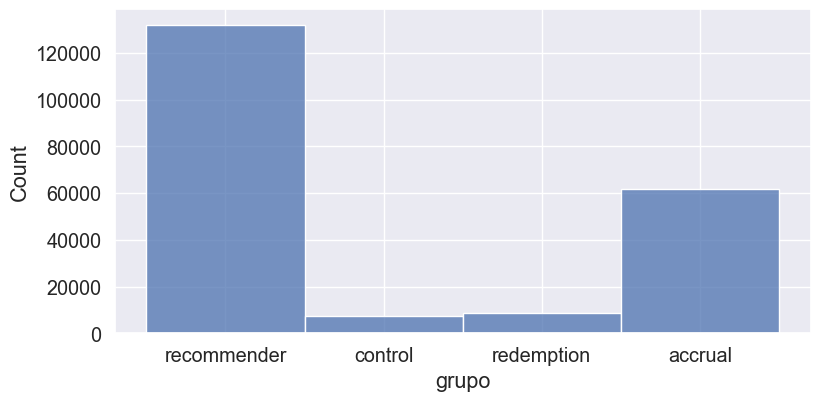

In [17]:
fig = plt.figure(figsize=(8, 4))
sns.histplot(data=df_Latam_clean, x='grupo');

In [18]:
df_Latam_clean.groupby('grupo').mean().T

grupo                      accrual       control   recommender    redemption
learning_group_flg        0.252687      0.019417      0.001317      0.164714
open_flag                 0.370162      0.000000      0.453285      0.478135
click_flag                0.011701      0.000000      0.024262      0.041295
post_open_flag            0.457127      0.000000      0.513814      0.511425
post_click_flag           0.025123      0.000000      0.049216      0.067465
post_conversion_flag      1.000000      1.000000      1.000000      1.000000
post_n_trx                1.472693      1.455346      1.475392      1.477693
post_USD                389.228714    251.749462    373.023402    380.193034
post_income_amt        1903.713220   1215.871717   1899.103963   1877.278760
post_puntos_LTM       14858.684872   6734.718239   7396.150431   9568.170838
pre_open_flag             0.385309      0.000000      0.438056      0.418934
pre_click_flag            0.018023      0.000000      0.040187      0.054407
pre_conversion_flag       0.833424      0.838994      0.846989      0.831338
pre_n_trx                 9.147187     11.773585     10.954110      9.351469
pre_USD                 415.726742    458.042643    583.662885    558.767830
pre_income_amt         2094.871796   2320.385407   2958.539443   2811.378312
pre_puntos_LTM        57261.107318  58741.779874  68558.533297  70684.023939

### learning_group_flg

In [19]:
df_Latam_clean.learning_group_flg.value_counts()

0    192500
1     17391
Name: learning_group_flg, dtype: int64

In [20]:
df_Latam_clean[['learning_group_flg', 'grupo']].value_counts()

learning_group_flg  grupo      
0                   recommender    131924
                    accrual         46305
1                   accrual         15657
0                   redemption       7201
                    control          7070
1                   redemption       1420
                    recommender       174
                    control           140
dtype: int64

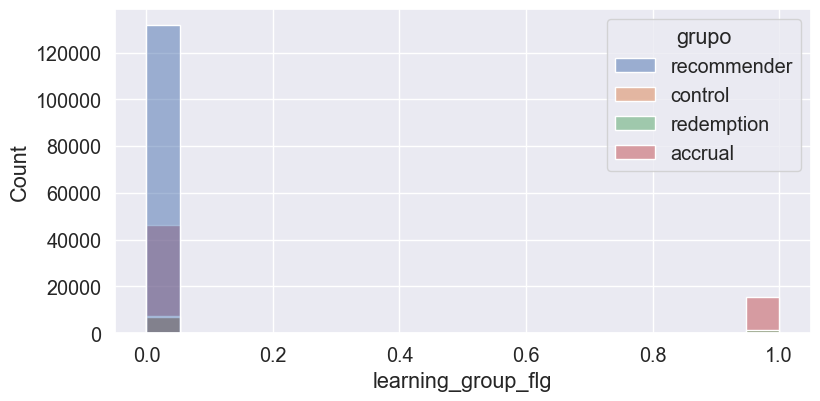

In [21]:
fig = plt.figure(figsize=(8, 4))
sns.histplot(data=df_Latam_clean, x='learning_group_flg', hue='grupo');

### open_date

### open_flag

### click_date

### click_flag

### product

## Pre

### pre_open_flag

### pre_click_flag

### pre_conversion_flag

### pre_n_trx

### pre_USD

### pre_income_amt

### pre_pontos_LTM

## Post

## post_open_flag

## post_click_flag

## post_conversion_flag

## post_n_trx

## post_USD

## post_income_amt

## post_pontos_LTM

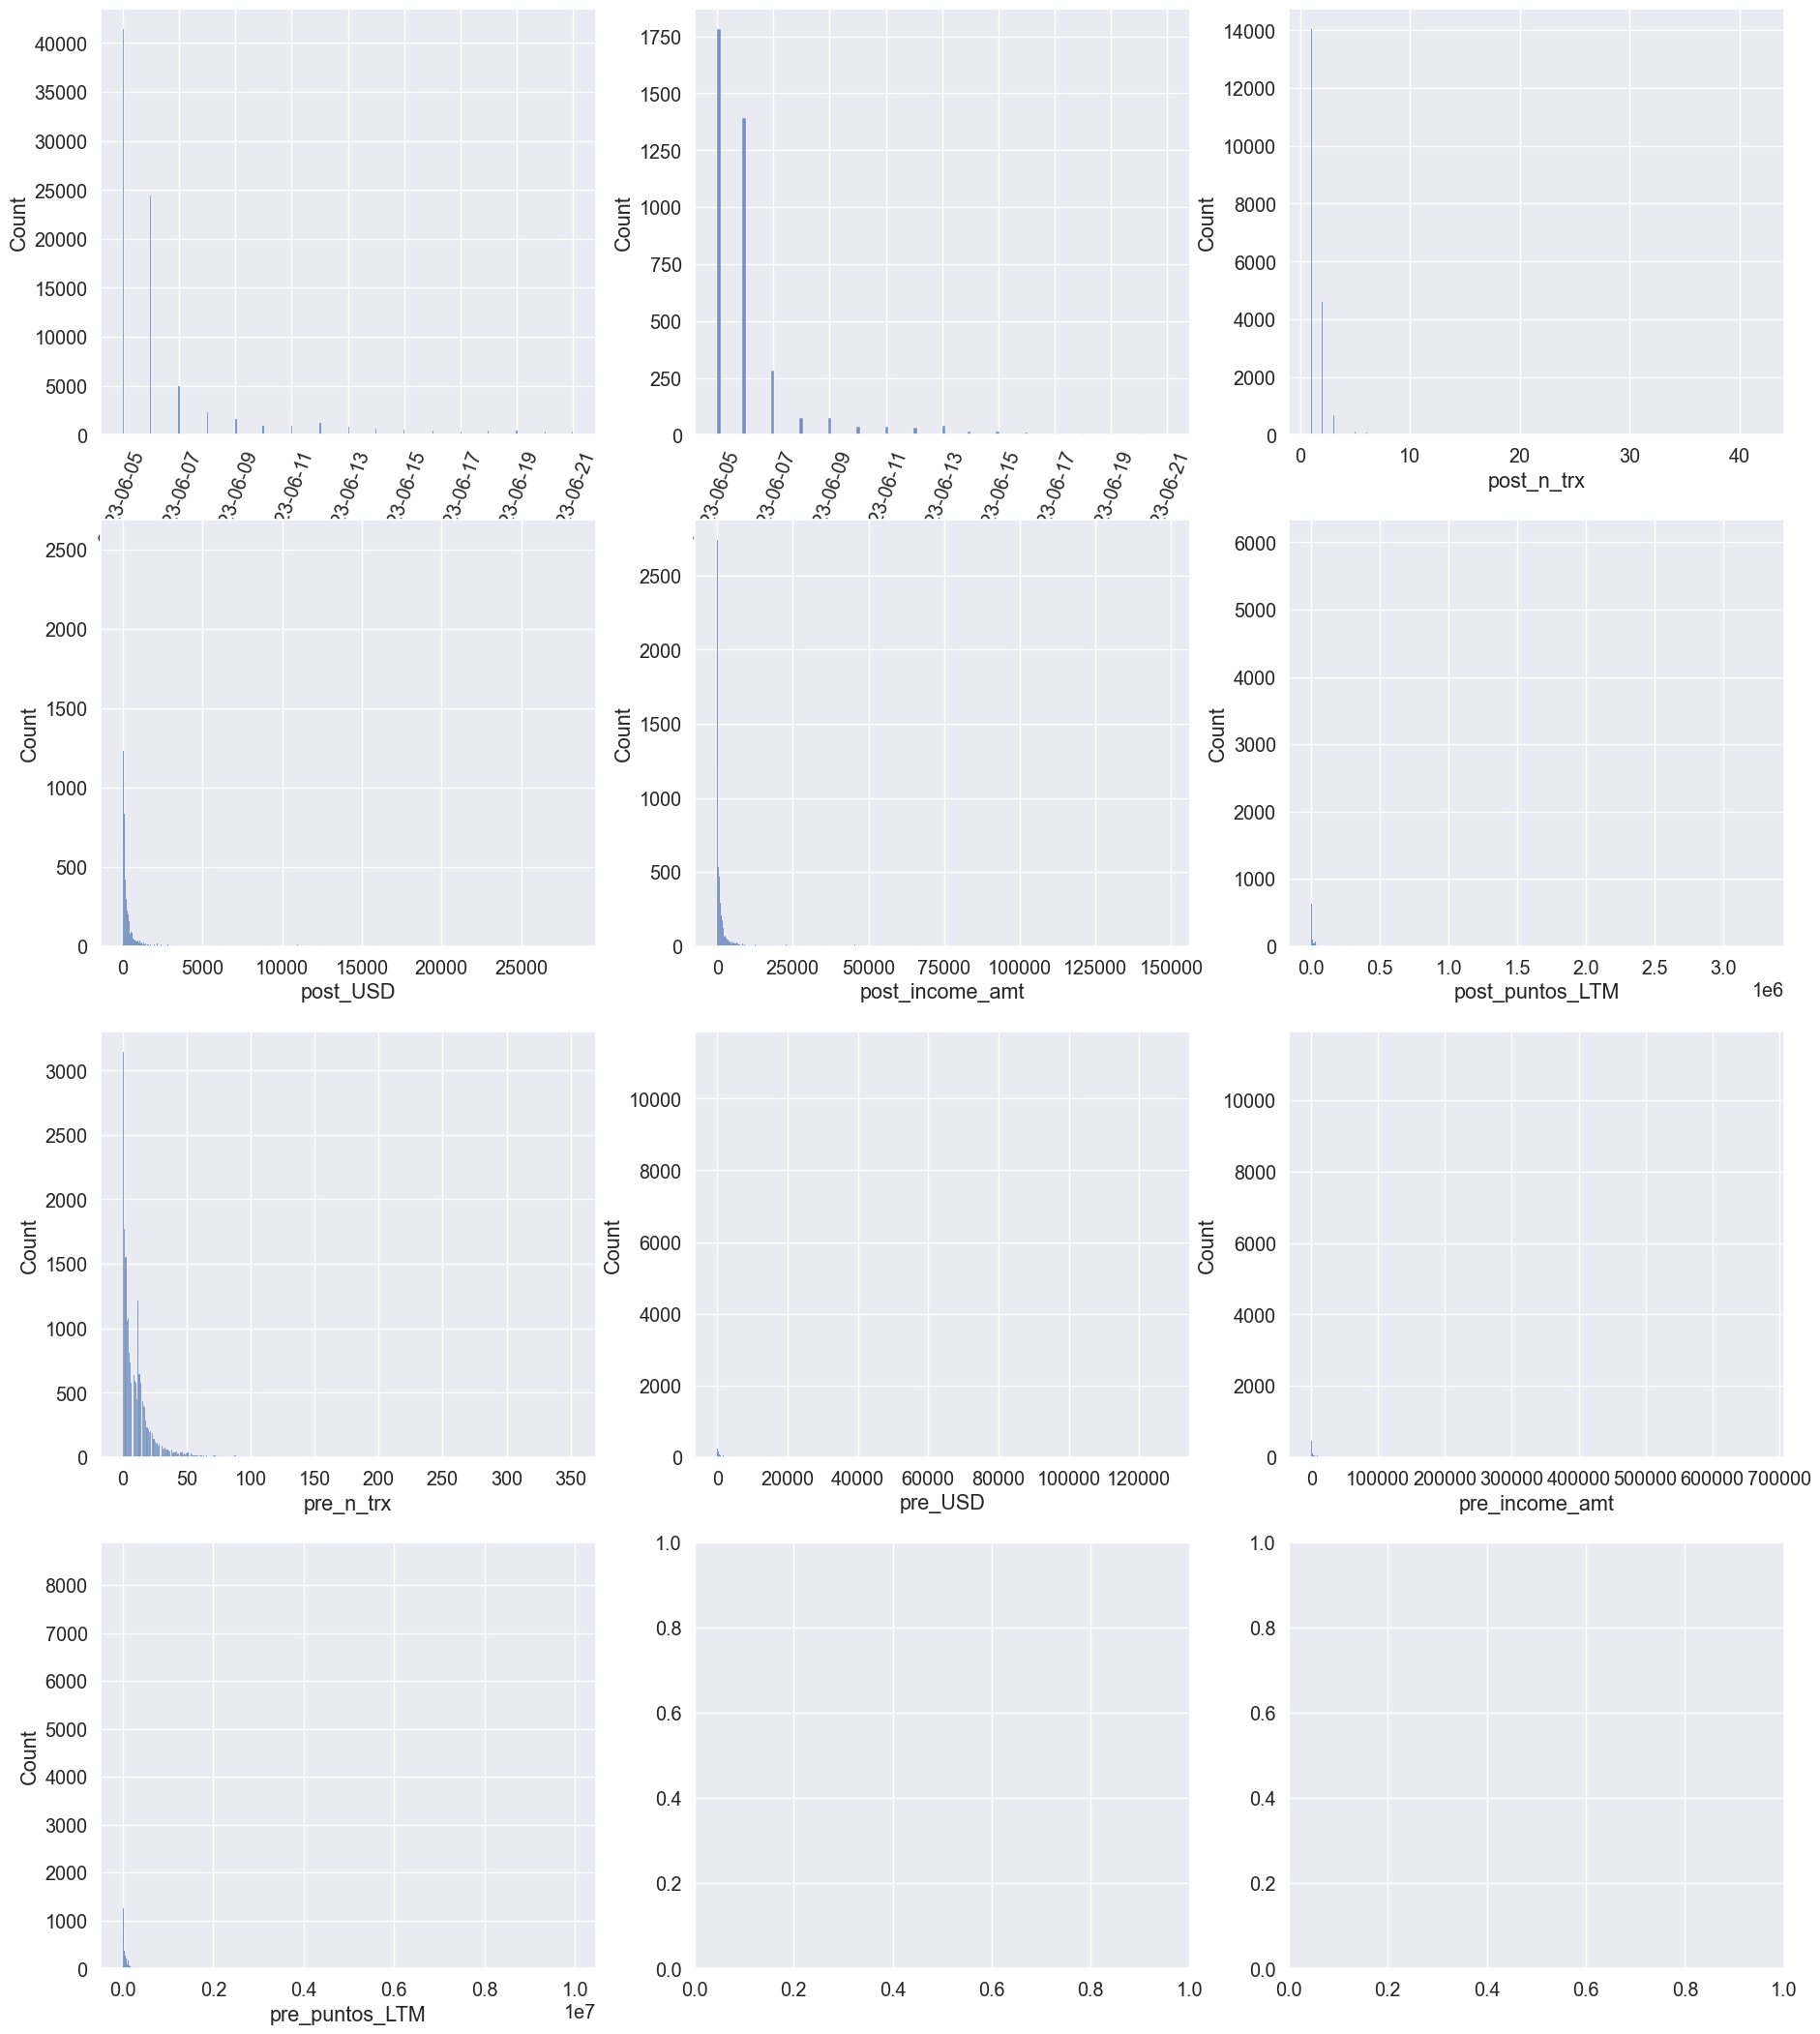

In [22]:
fig, axs = plt.subplots(4, 3, figsize=(20, 25))

sns.histplot(data=df_Latam, x=mas15[0], ax=axs[0,0])
sns.histplot(data=df_Latam, x=mas15[1], ax=axs[0,1])
sns.histplot(data=df_Latam, x=mas15[4], ax=axs[0,2])
sns.histplot(data=df_Latam, x=mas15[5], ax=axs[1,0])
sns.histplot(data=df_Latam, x=mas15[6], ax=axs[1,1])
sns.histplot(data=df_Latam, x=mas15[7], ax=axs[1,2])
sns.histplot(data=df_Latam, x=mas15[8], ax=axs[2,0])
sns.histplot(data=df_Latam, x=mas15[9], ax=axs[2,1])
sns.histplot(data=df_Latam, x=mas15[10], ax=axs[2,2])
sns.histplot(data=df_Latam, x=mas15[11], ax=axs[3,0])

for axs in fig.axes[:2]:
    axs.set_xticklabels(axs.get_xticklabels(), rotation=70)

plt.show()

In [23]:
menos15

['CAMPAIGN_NAME',
 'campaign_id',
 'campaign_date_start',
 'campaign_date_end',
 'audience_id',
 'grupo',
 'learning_group_flg',
 'grupo_augmented',
 'open_flag',
 'click_flag',
 'promotion_name',
 'promotion_type_name',
 'product',
 'GRUPO',
 'post_open_flag',
 'post_click_flag',
 'post_conversion_flag',
 'pre_open_flag',
 'pre_click_flag',
 'pre_conversion_flag',
 'type']

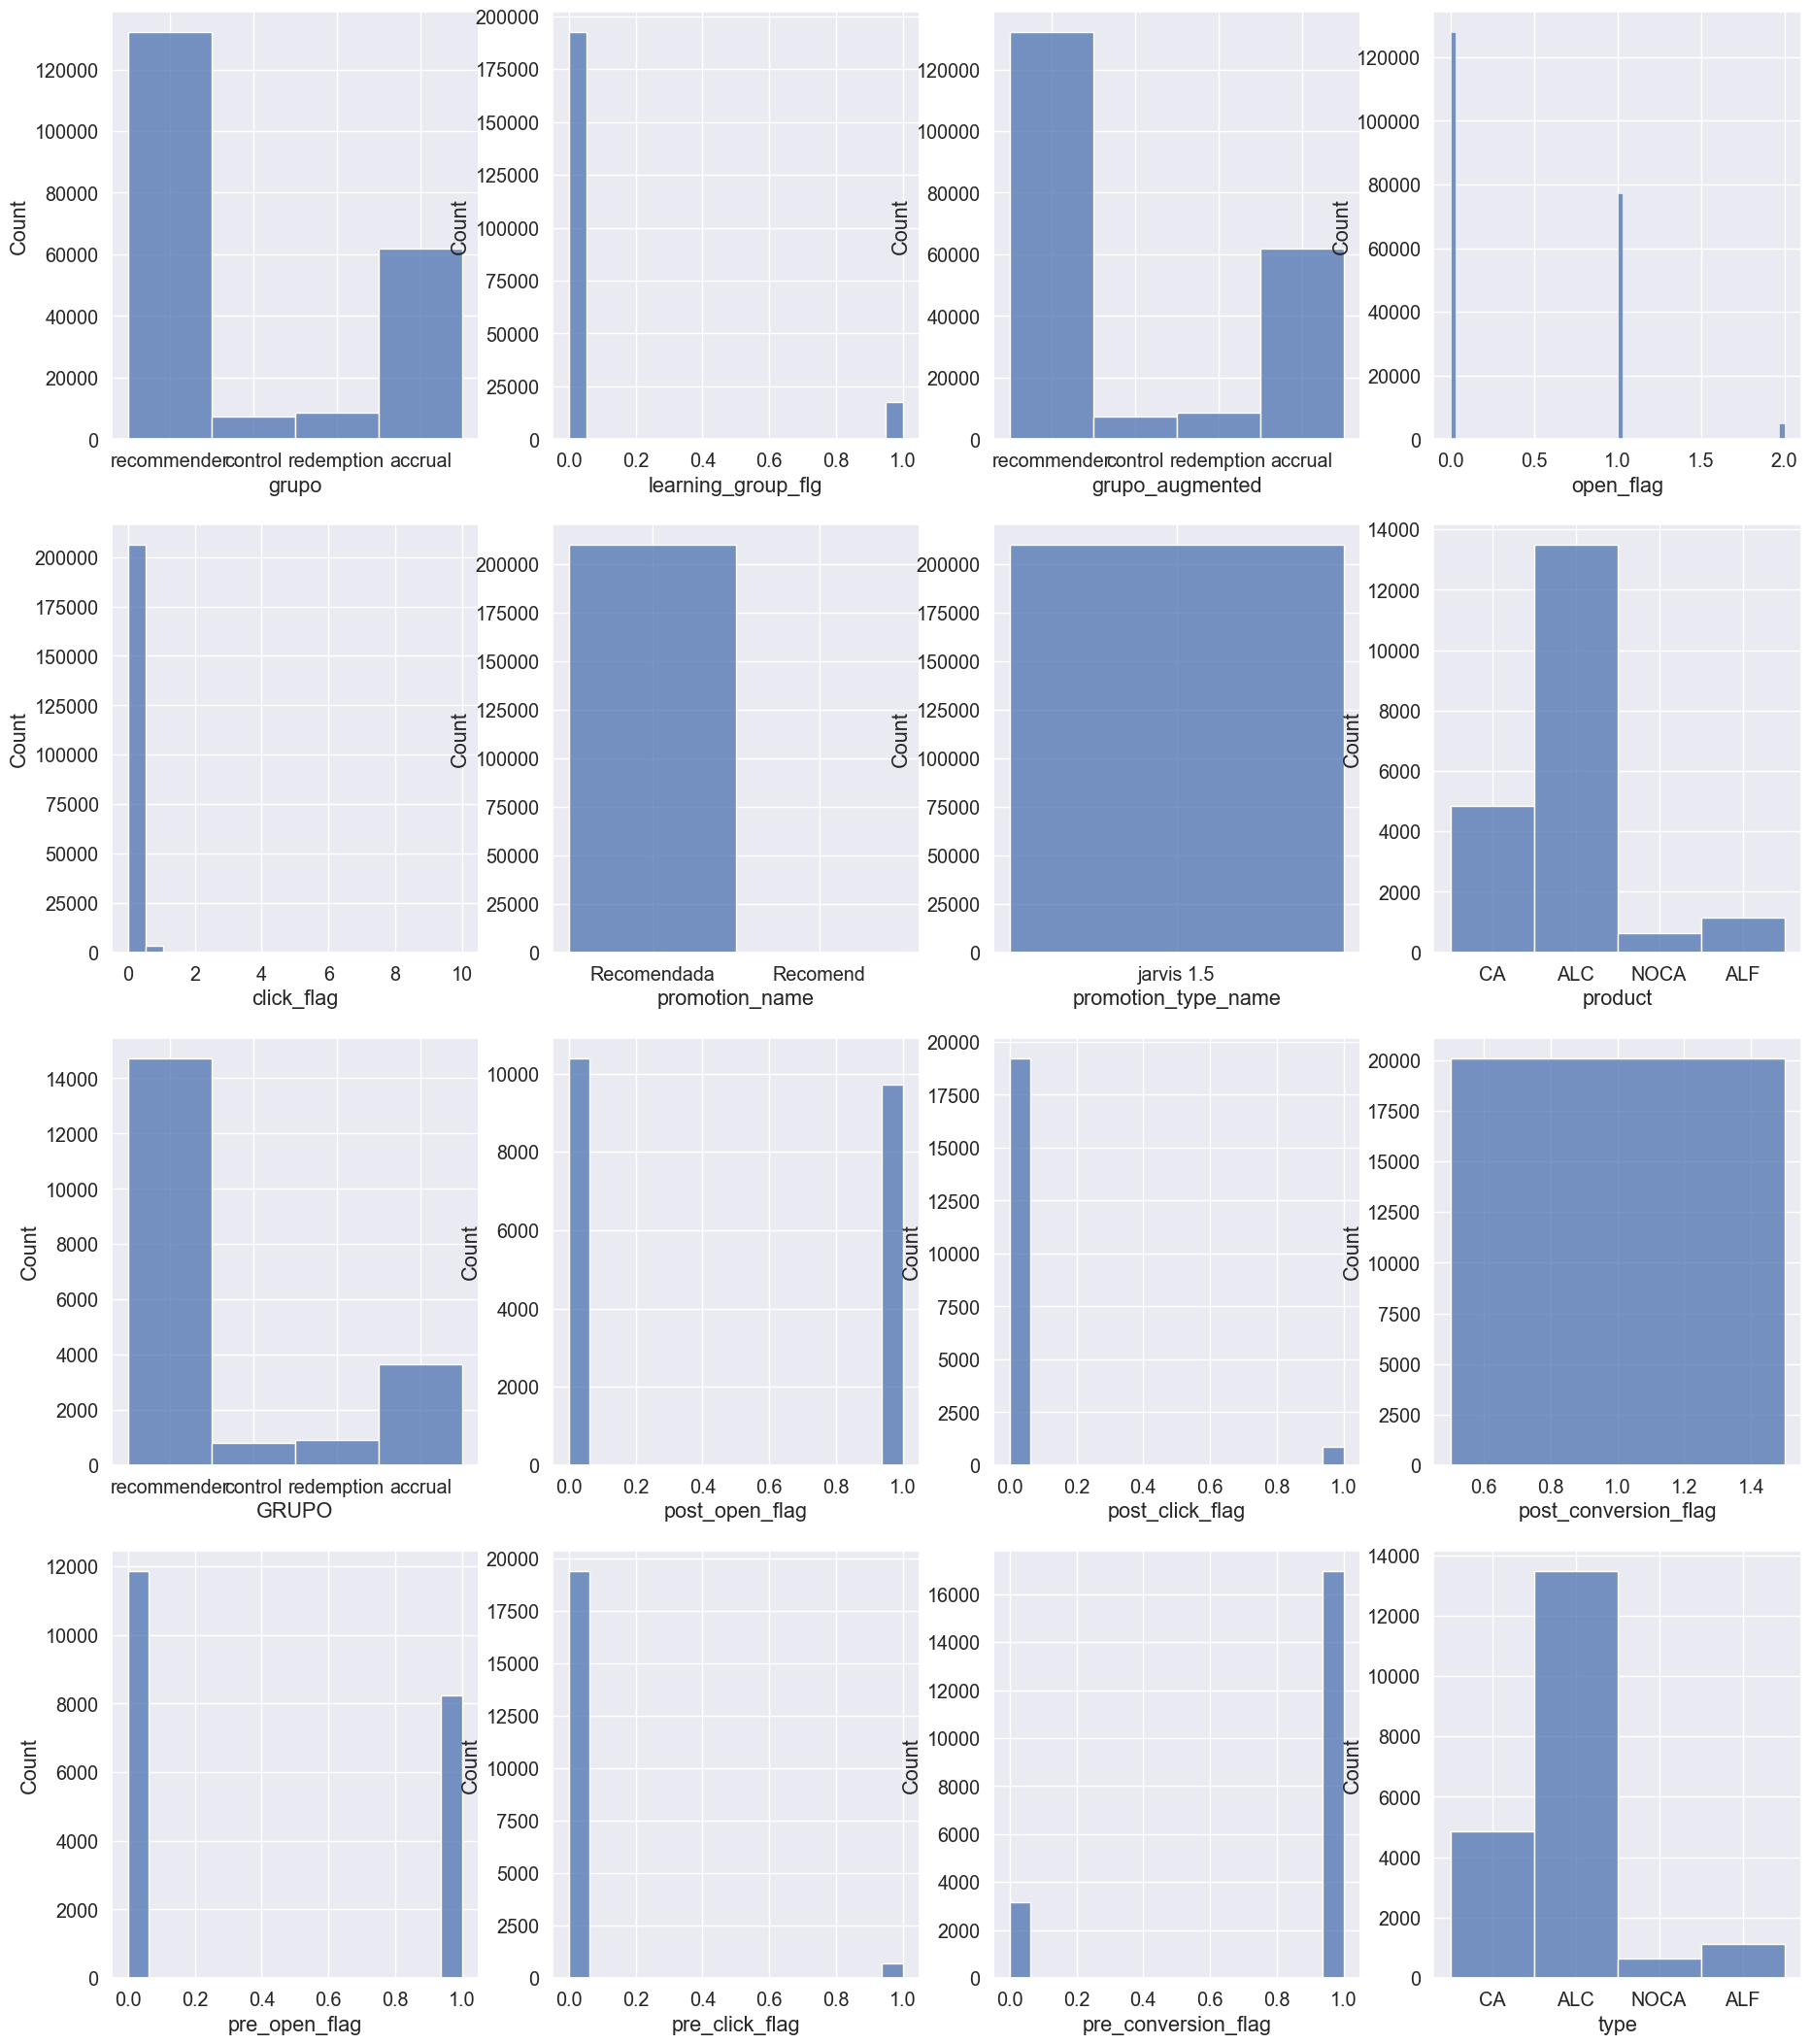

In [24]:
fig, axs = plt.subplots(4, 4, figsize=(20, 25))

sns.histplot(data=df_Latam, x=menos15[5], ax=axs[0,0])
sns.histplot(data=df_Latam, x=menos15[6], ax=axs[0,1])
sns.histplot(data=df_Latam, x=menos15[7], ax=axs[0,2])
sns.histplot(data=df_Latam, x=menos15[8], ax=axs[0,3])
sns.histplot(data=df_Latam, x=menos15[9], ax=axs[1,0])
sns.histplot(data=df_Latam, x=menos15[10], ax=axs[1,1])
sns.histplot(data=df_Latam, x=menos15[11], ax=axs[1,2])
sns.histplot(data=df_Latam, x=menos15[12], ax=axs[1,3])
sns.histplot(data=df_Latam, x=menos15[13], ax=axs[2,0])
sns.histplot(data=df_Latam, x=menos15[14], ax=axs[2,1])
sns.histplot(data=df_Latam, x=menos15[15], ax=axs[2,2])
sns.histplot(data=df_Latam, x=menos15[16], ax=axs[2,3])
sns.histplot(data=df_Latam, x=menos15[17], ax=axs[3,0])
sns.histplot(data=df_Latam, x=menos15[18], ax=axs[3,1])
sns.histplot(data=df_Latam, x=menos15[19], ax=axs[3,2])
sns.histplot(data=df_Latam, x=menos15[20], ax=axs[3,3])

plt.show()

In [25]:
df_Latam[(df_Latam['pre_open_flag'] == 0) & (df_Latam['post_open_flag'] == 1)]

CAMPAIGN_NAME  campaign_id campaign_date_start  \
419     20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   
607     20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   
864     20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   
883     20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   
1922    20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   
...                                      ...          ...                 ...   
208251  20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   
208751  20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   
209354  20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   
209433  20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   
209720  20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   

       campaign_date_end  audience_id        grupo  learning_group_flg  \
419           2023-06-05          345  recommender                   0   
607           2023-06-05          345  recommender                   0   
864           2023-06-05          345  recommender                   0   
883           2023-06-05          345  recommender                   0   
1922          2023-06-05          345  recommender                   0   
...                  ...          ...          ...                 ...   
208251        2023-06-05          345  recommender                   0   
208751        2023-06-05          345  recommender                   0   
209354        2023-06-05          345  recommender                   0   
209433        2023-06-05          345  recommender                   0   
209720        2023-06-05          345  recommender                   0   

       grupo_augmented  open_date  open_flag click_date  click_flag  \
419        recommender 2023-06-05          2        NaT           0   
607        recommender 2023-06-05          1        NaT           0   
864        recommender 2023-06-05          1        NaT           0   
883        recommender 2023-06-05          1        NaT           0   
1922       recommender 2023-06-05          1        NaT           0   
...                ...        ...        ...        ...         ...   
208251     recommender 2023-06-05          2        NaT           0   
208751     recommender 2023-06-09          1        NaT           0   
209354     recommender 2023-06-05          1        NaT           0   
209433     recommender 2023-06-06          1        NaT           0   
209720     recommender 2023-06-06          1        NaT           0   

       promotion_name promotion_type_name  \
419       Recomendada          jarvis 1.5   
607       Recomendada          jarvis 1.5   
864       Recomendada          jarvis 1.5   
883       Recomendada          jarvis 1.5   
1922      Recomendada          jarvis 1.5   
...               ...                 ...   
208251    Recomendada          jarvis 1.5   
208751    Recomendada          jarvis 1.5   
209354    Recomendada          jarvis 1.5   
209433    Recomendada          jarvis 1.5   
209720    Recomendada          jarvis 1.5   

                                          RECOMMENDATIONS  \
419     {"AC1":"ABASTECE AI","AC2":"BANCO ITAU","AC3":...   
607     {"AC1":"B2W","AC2":"BOOKING.COM","AC3":"MAGAZI...   
864     {"AC1":"ABASTECE AI","AC2":"BANCO ITAU","AC3":...   
883     {"AC1":"B2W","AC2":"BOOKING.COM","AC3":"MAGAZI...   
1922    {"AC1":"NETSHOES","AC2":"B2W","AC3":"MAGAZINE_...   
...                                                   ...   
208251  {"AC1":"ABASTECE AI","AC2":"B2W","AC3":"BOOKIN...   
208751  {"AC1":"B2W","AC2":"BOOKING.COM","AC3":"MAGAZI...   
209354  {"AC1":"ABASTECE AI","AC2":"GENERICO BANCOS","...   
209433  {"AC1":"GENERICO BANCOS","AC2":"ABASTECE AI","...   
209720  {"AC1":"B2W","AC2":"VENTA DO PUNTOS","AC3":"BO...   

                                          

In [26]:
df_Latam[(df_Latam['pre_open_flag'] == 1) & (df_Latam['post_open_flag'] == 1)]

CAMPAIGN_NAME  campaign_id campaign_date_start  \
26      20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   
176     20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   
183     20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   
248     20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   
300     20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   
...                                      ...          ...                 ...   
209810  20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   
209818  20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   
209839  20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   
209873  20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   
209887  20230605_EMAIL_HIBRIDO_JARVIS_JUN_23    5867194.0          2023-06-05   

       campaign_date_end  audience_id        grupo  learning_group_flg  \
26            2023-06-05          345  recommender                   0   
176           2023-06-05          345  recommender                   0   
183           2023-06-05          345  recommender                   0   
248           2023-06-05          345  recommender                   0   
300           2023-06-05          345  recommender                   0   
...                  ...          ...          ...                 ...   
209810        2023-06-05          345  recommender                   0   
209818        2023-06-05          345  recommender                   0   
209839        2023-06-05          345  recommender                   0   
209873        2023-06-05          345  recommender                   0   
209887        2023-06-05          345  recommender                   0   

       grupo_augmented  open_date  open_flag click_date  click_flag  \
26         recommender 2023-06-06          1        NaT           0   
176        recommender 2023-06-05          1        NaT           0   
183        recommender 2023-06-05          1        NaT           0   
248        recommender 2023-06-05          1        NaT           0   
300        recommender 2023-06-05          1        NaT           0   
...                ...        ...        ...        ...         ...   
209810     recommender 2023-06-05          2        NaT           0   
209818     recommender 2023-06-06          1        NaT           0   
209839     recommender 2023-06-05          1        NaT           0   
209873     recommender 2023-06-06          1        NaT           0   
209887     recommender 2023-06-05          1        NaT           0   

       promotion_name promotion_type_name  \
26        Recomendada          jarvis 1.5   
176       Recomendada          jarvis 1.5   
183       Recomendada          jarvis 1.5   
248       Recomendada          jarvis 1.5   
300       Recomendada          jarvis 1.5   
...               ...                 ...   
209810    Recomendada          jarvis 1.5   
209818    Recomendada          jarvis 1.5   
209839    Recomendada          jarvis 1.5   
209873    Recomendada          jarvis 1.5   
209887    Recomendada          jarvis 1.5   

                                          RECOMMENDATIONS  \
26      {"AC1":"BANCO ITAU","AC2":"SATELITAL","AC3":"V...   
176     {"AC1":"B2W","AC2":"BOOKING.COM","AC3":"MAGAZI...   
183     {"AC1":"B2W","AC2":"BOOKING.COM","AC3":"MAGAZI...   
248     {"AC1":"B2W","AC2":"BOOKING.COM","AC3":"MAGAZI...   
300     {"AC1":"GENERICO BANCOS","AC2":"ABASTECE AI","...   
...                                                   ...   
209810  {"AC1":"ABASTECE_AI","AC2":"GENERICO BANCOS","...   
209818  {"AC1":"ABASTECE AI","AC2":"GENERICO BANCOS","...   
209839  {"AC1":"BANCO ITAU","AC2":"ABASTECE AI","AC3":...   
209873  {"AC1":"ABASTECE AI","AC2":"BANCO ITAU","AC3":...   
209887  {"AC1":"ABASTECE AI","AC2":"BANCO ITAU","AC3":...   

                                          

In [27]:
for i in range(0, len(df_Latam)):
    if df_Latam.iloc[i,22]>df_Latam.iloc[i,29]:
        print(f'{i}: {df_Latam.iloc[i,20]}')

116: 1.0
285: 1.0
419: 1.0
426: 1.0
673: 1.0
864: 1.0
883: 1.0
1002: 1.0
1013: 1.0
1037: 1.0
1049: 1.0
2057: 1.0
2139: 1.0
2298: 1.0
2299: 1.0
2378: 1.0
2584: 1.0
2608: 1.0
2665: 1.0
2871: 1.0
2926: 1.0
2927: 1.0
3180: 1.0
3571: 1.0
3680: 1.0
3832: 1.0
3990: 1.0
4426: 1.0
4553: 1.0
4691: 1.0
4725: 1.0
4726: 1.0
4797: 1.0
5014: 1.0
5879: 1.0
5914: 1.0
5948: 1.0
5967: 1.0
5968: 1.0
5994: 1.0
6377: 1.0
6466: 1.0
6479: 1.0
6533: 1.0
6669: 1.0
6728: 1.0
6841: 1.0
7029: 1.0
7050: 1.0
7184: 1.0
7399: 1.0
7611: 1.0
7612: 1.0
7620: 1.0
7689: 1.0
7750: 1.0
7895: 1.0
7942: 1.0
7982: 1.0
8026: 1.0
8172: 1.0
8236: 1.0
8333: 1.0
8335: 1.0
8357: 1.0
8429: 1.0
8745: 1.0
8974: 1.0
9253: 1.0
9800: 1.0
10126: 1.0
10289: 1.0
10386: 1.0
10418: 1.0
10645: 1.0
10737: 1.0
10966: 1.0
11330: 1.0
11609: 1.0
11613: 1.0
11653: 1.0
11719: 1.0
11777: 1.0
11791: 1.0
11824: 1.0
11856: 1.0
11913: 1.0
11962: 1.0
12008: 1.0
12035: 1.0
12044: 1.0
12141: 1.0
12346: 1.0
12347: 1.0
12448: 1.0
12785: 1.0
13078: 1.0
13244: 1.0

80607: 1.0
80608: 1.0
80672: 1.0
80697: 1.0
80713: 1.0
80767: 1.0
80817: 1.0
80884: 1.0
80916: 1.0
80926: 1.0
80938: 1.0
80951: 1.0
81013: 1.0
81046: 1.0
81081: 1.0
81095: 1.0
81159: 1.0
81164: 1.0
81187: 1.0
81254: 1.0
81292: 1.0
81337: 1.0
81345: 1.0
81366: 1.0
81376: 1.0
81471: 1.0
81474: 1.0
81580: 1.0
81589: 1.0
81694: 1.0
81713: 1.0
81772: 1.0
81878: 1.0
81904: 1.0
81905: 1.0
81906: 1.0
81924: 1.0
81931: 1.0
81932: 1.0
81937: 1.0
81938: 1.0
81943: 1.0
82002: 1.0
82068: 1.0
82102: 1.0
82130: 1.0
82156: 1.0
82162: 1.0
82176: 1.0
82362: 1.0
82368: 1.0
82426: 1.0
82446: 1.0
82450: 1.0
82451: 1.0
82510: 1.0
82512: 1.0
82571: 1.0
82603: 1.0
82722: 1.0
82740: 1.0
82783: 1.0
82959: 1.0
83026: 1.0
83048: 1.0
83049: 1.0
83063: 1.0
83064: 1.0
83154: 1.0
83188: 1.0
83218: 1.0
83248: 1.0
83452: 1.0
83519: 1.0
83533: 1.0
83571: 1.0
83601: 1.0
83625: 1.0
83633: 1.0
83649: 1.0
83731: 1.0
83743: 1.0
83776: 1.0
83783: 1.0
83960: 1.0
84056: 1.0
84179: 1.0
84219: 1.0
84250: 1.0
84327: 1.0
84422: 1.0

112024: 1.0
112178: 1.0
112189: 1.0
112191: 1.0
112198: 1.0
112272: 1.0
112320: 1.0
112323: 1.0
112363: 1.0
112526: 1.0
112531: 1.0
112573: 1.0
112648: 1.0
112692: 1.0
112709: 1.0
112741: 1.0
112758: 1.0
112810: 1.0
112816: 1.0
112831: 1.0
112834: 1.0
112841: 1.0
112921: 1.0
112946: 1.0
112952: 1.0
112953: 1.0
113093: 1.0
113094: 1.0
113157: 1.0
113220: 1.0
113233: 1.0
113247: 1.0
113249: 1.0
113260: 1.0
113296: 1.0
113341: 1.0
113353: 1.0
113372: 1.0
113382: 1.0
113384: 1.0
113398: 1.0
113423: 1.0
113443: 1.0
113512: 1.0
113513: 1.0
113532: 1.0
113553: 1.0
113698: 1.0
113705: 1.0
113747: 1.0
113856: 1.0
113878: 1.0
114005: 1.0
114161: 1.0
114217: 1.0
114229: 1.0
114257: 1.0
114265: 1.0
114392: 1.0
114393: 1.0
114395: 1.0
114474: 1.0
114581: 1.0
114782: 1.0
114803: 1.0
114819: 1.0
114960: 1.0
115025: 1.0
115117: 1.0
115207: 1.0
115208: 1.0
115235: 1.0
115295: 1.0
115371: 1.0
115403: 1.0
115441: 1.0
115580: 1.0
115644: 1.0
115645: 1.0
115646: 1.0
115679: 1.0
115709: 1.0
115717: 1.0
1157

145212: 1.0
145252: 1.0
145280: 1.0
145326: 1.0
145347: 1.0
145387: 1.0
145473: 1.0
145543: 1.0
145568: 1.0
145587: 1.0
145594: 1.0
145615: 1.0
145764: 1.0
145774: 1.0
145808: 1.0
145821: 1.0
145832: 1.0
145835: 1.0
145888: 1.0
145894: 1.0
145991: 1.0
146003: 1.0
146022: 1.0
146039: 1.0
146070: 1.0
146108: 1.0
146135: 1.0
146136: 1.0
146162: 1.0
146167: 1.0
146232: 1.0
146289: 1.0
146320: 1.0
146334: 1.0
146336: 1.0
146345: 1.0
146362: 1.0
146364: 1.0
146428: 1.0
146455: 1.0
146499: 1.0
146511: 1.0
146512: 1.0
146532: 1.0
146533: 1.0
146597: 1.0
146641: 1.0
146666: 1.0
146690: 1.0
146695: 1.0
146747: 1.0
146775: 1.0
146808: 1.0
146844: 1.0
146875: 1.0
146910: 1.0
146946: 1.0
146970: 1.0
146980: 1.0
146996: 1.0
147043: 1.0
147044: 1.0
147133: 1.0
147134: 1.0
147157: 1.0
147158: 1.0
147174: 1.0
147291: 1.0
147301: 1.0
147315: 1.0
147426: 1.0
147471: 1.0
147476: 1.0
147486: 1.0
147496: 1.0
147497: 1.0
147571: 1.0
147608: 1.0
147644: 1.0
147656: 1.0
147698: 1.0
147750: 1.0
147821: 1.0
1478

179237: 1.0
179247: 1.0
179374: 1.0
179412: 1.0
179436: 1.0
179453: 1.0
179582: 1.0
179703: 1.0
179733: 1.0
179859: 1.0
179951: 1.0
180050: 1.0
180056: 1.0
180078: 1.0
180096: 1.0
180115: 1.0
180129: 1.0
180167: 1.0
180217: 1.0
180336: 1.0
180337: 1.0
180412: 1.0
180460: 1.0
180479: 1.0
180505: 1.0
180625: 1.0
180696: 1.0
180727: 1.0
180757: 1.0
180831: 1.0
180881: 1.0
180925: 1.0
181003: 1.0
181011: 1.0
181087: 1.0
181093: 1.0
181154: 1.0
181167: 1.0
181207: 1.0
181232: 1.0
181349: 1.0
181413: 1.0
181460: 1.0
181493: 1.0
181644: 1.0
181731: 1.0
181894: 1.0
181908: 1.0
181911: 1.0
181983: 1.0
182035: 1.0
182084: 1.0
182260: 1.0
182280: 1.0
182335: 1.0
182490: 1.0
182513: 1.0
182526: 1.0
182531: 1.0
182583: 1.0
182603: 1.0
182616: 1.0
182672: 1.0
182690: 1.0
182691: 1.0
182702: 1.0
182712: 1.0
182743: 1.0
182745: 1.0
182750: 1.0
182769: 1.0
182802: 1.0
182852: 1.0
182917: 1.0
182963: 1.0
182968: 1.0
183061: 1.0
183151: 1.0
183207: 1.0
183214: 1.0
183253: 1.0
183369: 1.0
183493: 1.0
1834

In [28]:
for i in range(0, len(df_Latam)):
    if df_Latam.iloc[i,24]<df_Latam.iloc[i,31]:
        print(f'{i}: {df_Latam.iloc[i,20]}')

118: 1.0
134: 1.0
176: 1.0
183: 1.0
211: 1.0
232: 1.0
248: 1.0
300: 1.0
309: 1.0
352: 1.0
358: 1.0
375: 1.0
397: 1.0
425: 1.0
453: 1.0
466: 1.0
511: 1.0
579: 1.0
582: 1.0
593: 1.0
613: 1.0
637: 1.0
643: 1.0
664: 1.0
684: 1.0
730: 1.0
737: 1.0
892: 1.0
925: 1.0
1008: 1.0
1012: 1.0
1022: 1.0
1027: 1.0
1036: 1.0
1039: 1.0
1048: 1.0
1078: 1.0
1092: 1.0
1106: 1.0
1118: 1.0
1147: 1.0
1149: 1.0
1179: 1.0
1232: 1.0
1283: 1.0
1351: 1.0
1429: 1.0
1482: 1.0
1517: 1.0
1598: 1.0
1622: 1.0
1655: 1.0
1698: 1.0
1736: 1.0
1747: 1.0
1764: 1.0
1765: 1.0
1795: 1.0
1801: 1.0
1871: 1.0
1887: 1.0
1959: 1.0
1993: 1.0
2006: 1.0
2014: 1.0
2021: 1.0
2022: 1.0
2061: 1.0
2093: 1.0
2122: 1.0
2181: 1.0
2222: 1.0
2254: 1.0
2308: 1.0
2486: 1.0
2528: 1.0
2543: 1.0
2595: 1.0
2598: 1.0
2641: 1.0
2643: 1.0
2686: 1.0
2694: 1.0
2704: 1.0
2723: 1.0
2745: 1.0
2757: 1.0
2765: 1.0
2864: 1.0
2875: 1.0
2918: 1.0
2933: 1.0
2980: 1.0
3018: 1.0
3056: 1.0
3071: 1.0
3163: 1.0
3171: 1.0
3196: 1.0
3227: 1.0
3230: 1.0
3279: 1.0
3313: 1.0

22323: 1.0
22331: 1.0
22341: 1.0
22366: 1.0
22391: 1.0
22437: 1.0
22487: 1.0
22520: 1.0
22526: 1.0
22535: 1.0
22554: 1.0
22556: 1.0
22619: 1.0
22623: 1.0
22634: 1.0
22689: 1.0
22703: 1.0
22731: 1.0
22809: 1.0
22886: 1.0
22900: 1.0
22933: 1.0
22976: 1.0
22992: 1.0
23033: 1.0
23054: 1.0
23064: 1.0
23083: 1.0
23087: 1.0
23113: 1.0
23132: 1.0
23136: 1.0
23138: 1.0
23188: 1.0
23198: 1.0
23211: 1.0
23230: 1.0
23300: 1.0
23373: 1.0
23425: 1.0
23426: 1.0
23431: 1.0
23435: 1.0
23441: 1.0
23468: 1.0
23584: 1.0
23587: 1.0
23601: 1.0
23616: 1.0
23628: 1.0
23630: 1.0
23686: 1.0
23687: 1.0
23688: 1.0
23689: 1.0
23743: 1.0
23774: 1.0
23798: 1.0
23812: 1.0
23853: 1.0
23893: 1.0
23999: 1.0
24015: 1.0
24067: 1.0
24083: 1.0
24111: 1.0
24126: 1.0
24160: 1.0
24227: 1.0
24228: 1.0
24232: 1.0
24245: 1.0
24253: 1.0
24258: 1.0
24290: 1.0
24412: 1.0
24415: 1.0
24461: 1.0
24530: 1.0
24646: 1.0
24708: 1.0
24742: 1.0
24756: 1.0
24757: 1.0
24784: 1.0
24786: 1.0
24823: 1.0
24842: 1.0
24896: 1.0
24898: 1.0
24902: 1.0

42605: 1.0
42608: 1.0
42621: 1.0
42712: 1.0
42720: 1.0
42728: 1.0
42740: 1.0
42750: 1.0
42770: 1.0
42813: 1.0
42821: 1.0
42851: 1.0
42854: 1.0
42865: 1.0
42898: 1.0
42901: 1.0
42914: 1.0
42930: 1.0
43009: 1.0
43037: 1.0
43134: 1.0
43136: 1.0
43287: 1.0
43289: 1.0
43294: 1.0
43337: 1.0
43351: 1.0
43374: 1.0
43455: 1.0
43474: 1.0
43476: 1.0
43494: 1.0
43526: 1.0
43538: 1.0
43542: 1.0
43603: 1.0
43651: 1.0
43661: 1.0
43669: 1.0
43675: 1.0
43685: 1.0
43708: 1.0
43717: 1.0
43742: 1.0
43775: 1.0
43777: 1.0
43853: 1.0
43878: 1.0
43922: 1.0
44045: 1.0
44053: 1.0
44067: 1.0
44113: 1.0
44162: 1.0
44164: 1.0
44193: 1.0
44199: 1.0
44244: 1.0
44278: 1.0
44280: 1.0
44286: 1.0
44296: 1.0
44301: 1.0
44333: 1.0
44343: 1.0
44347: 1.0
44368: 1.0
44384: 1.0
44397: 1.0
44435: 1.0
44446: 1.0
44464: 1.0
44498: 1.0
44531: 1.0
44621: 1.0
44631: 1.0
44641: 1.0
44705: 1.0
44726: 1.0
44799: 1.0
44820: 1.0
44821: 1.0
44824: 1.0
44832: 1.0
44835: 1.0
44848: 1.0
44850: 1.0
44869: 1.0
44922: 1.0
44923: 1.0
44925: 1.0

63459: 1.0
63478: 1.0
63481: 1.0
63500: 1.0
63530: 1.0
63582: 1.0
63692: 1.0
63741: 1.0
63745: 1.0
63778: 1.0
63781: 1.0
63789: 1.0
63823: 1.0
63835: 1.0
63837: 1.0
63864: 1.0
63881: 1.0
63927: 1.0
63998: 1.0
64032: 1.0
64058: 1.0
64077: 1.0
64084: 1.0
64094: 1.0
64099: 1.0
64105: 1.0
64183: 1.0
64184: 1.0
64191: 1.0
64237: 1.0
64265: 1.0
64272: 1.0
64331: 1.0
64351: 1.0
64397: 1.0
64402: 1.0
64454: 1.0
64463: 1.0
64506: 1.0
64562: 1.0
64584: 1.0
64617: 1.0
64728: 1.0
64798: 1.0
64818: 1.0
64894: 1.0
64917: 1.0
64946: 1.0
64949: 1.0
64966: 1.0
64971: 1.0
64974: 1.0
65001: 1.0
65023: 1.0
65073: 1.0
65078: 1.0
65095: 1.0
65133: 1.0
65135: 1.0
65136: 1.0
65166: 1.0
65185: 1.0
65190: 1.0
65194: 1.0
65198: 1.0
65234: 1.0
65259: 1.0
65268: 1.0
65278: 1.0
65355: 1.0
65436: 1.0
65453: 1.0
65463: 1.0
65485: 1.0
65508: 1.0
65522: 1.0
65526: 1.0
65550: 1.0
65596: 1.0
65601: 1.0
65632: 1.0
65645: 1.0
65651: 1.0
65653: 1.0
65724: 1.0
65758: 1.0
65770: 1.0
65806: 1.0
65898: 1.0
65906: 1.0
65954: 1.0

79269: 1.0
79322: 1.0
79345: 1.0
79356: 1.0
79364: 1.0
79370: 1.0
79374: 1.0
79393: 1.0
79418: 1.0
79431: 1.0
79448: 1.0
79449: 1.0
79461: 1.0
79469: 1.0
79491: 1.0
79513: 1.0
79530: 1.0
79565: 1.0
79649: 1.0
79651: 1.0
79664: 1.0
79669: 1.0
79684: 1.0
79722: 1.0
79727: 1.0
79740: 1.0
79741: 1.0
79743: 1.0
79757: 1.0
79793: 1.0
79805: 1.0
79807: 1.0
79829: 1.0
79831: 1.0
79836: 1.0
79845: 1.0
79861: 1.0
79865: 1.0
79883: 1.0
79893: 1.0
79897: 1.0
79920: 1.0
79923: 1.0
79928: 1.0
79939: 1.0
79941: 1.0
79944: 1.0
79947: 1.0
79955: 1.0
79969: 1.0
79972: 1.0
79979: 1.0
80061: 1.0
80067: 1.0
80103: 1.0
80157: 1.0
80162: 1.0
80172: 1.0
80173: 1.0
80199: 1.0
80230: 1.0
80241: 1.0
80244: 1.0
80286: 1.0
80290: 1.0
80304: 1.0
80320: 1.0
80328: 1.0
80337: 1.0
80384: 1.0
80390: 1.0
80395: 1.0
80405: 1.0
80410: 1.0
80430: 1.0
80440: 1.0
80463: 1.0
80464: 1.0
80465: 1.0
80466: 1.0
80467: 1.0
80468: 1.0
80469: 1.0
80470: 1.0
80486: 1.0
80508: 1.0
80550: 1.0
80573: 1.0
80593: 1.0
80609: 1.0
80633: 1.0

89686: 1.0
89698: 1.0
89702: 1.0
89711: 1.0
89732: 1.0
89735: 1.0
89741: 1.0
89743: 1.0
89756: 1.0
89767: 1.0
89771: 1.0
89772: 1.0
89776: 1.0
89790: 1.0
89795: 1.0
89798: 1.0
89842: 1.0
89843: 1.0
89858: 1.0
89861: 1.0
89889: 1.0
89895: 1.0
89918: 1.0
89927: 1.0
89929: 1.0
89933: 1.0
89952: 1.0
89961: 1.0
89964: 1.0
89977: 1.0
89980: 1.0
89986: 1.0
89991: 1.0
89995: 1.0
89997: 1.0
90006: 1.0
90007: 1.0
90008: 1.0
90009: 1.0
90016: 1.0
90019: 1.0
90053: 1.0
90076: 1.0
90080: 1.0
90081: 1.0
90088: 1.0
90094: 1.0
90129: 1.0
90148: 1.0
90166: 1.0
90188: 1.0
90194: 1.0
90216: 1.0
90217: 1.0
90241: 1.0
90252: 1.0
90266: 1.0
90277: 1.0
90279: 1.0
90299: 1.0
90300: 1.0
90306: 1.0
90307: 1.0
90314: 1.0
90320: 1.0
90350: 1.0
90376: 1.0
90379: 1.0
90383: 1.0
90390: 1.0
90395: 1.0
90405: 1.0
90413: 1.0
90429: 1.0
90430: 1.0
90439: 1.0
90449: 1.0
90461: 1.0
90495: 1.0
90499: 1.0
90508: 1.0
90516: 1.0
90520: 1.0
90550: 1.0
90576: 1.0
90595: 1.0
90609: 1.0
90619: 1.0
90622: 1.0
90633: 1.0
90648: 1.0

100388: 1.0
100389: 1.0
100391: 1.0
100412: 1.0
100420: 1.0
100440: 1.0
100449: 1.0
100451: 1.0
100453: 1.0
100454: 1.0
100479: 1.0
100480: 1.0
100481: 1.0
100482: 1.0
100483: 1.0
100517: 1.0
100521: 1.0
100522: 1.0
100527: 1.0
100578: 1.0
100591: 1.0
100618: 1.0
100669: 1.0
100684: 1.0
100736: 1.0
100747: 1.0
100757: 1.0
100761: 1.0
100772: 1.0
100780: 1.0
100781: 1.0
100858: 1.0
100864: 1.0
100884: 1.0
100888: 1.0
100907: 1.0
100912: 1.0
100927: 1.0
100933: 1.0
100935: 1.0
100945: 1.0
100968: 1.0
101004: 1.0
101033: 1.0
101038: 1.0
101047: 1.0
101049: 1.0
101058: 1.0
101067: 1.0
101088: 1.0
101092: 1.0
101100: 1.0
101105: 1.0
101119: 1.0
101120: 1.0
101180: 1.0
101182: 1.0
101186: 1.0
101190: 1.0
101204: 1.0
101212: 1.0
101218: 1.0
101229: 1.0
101234: 1.0
101246: 1.0
101263: 1.0
101275: 1.0
101284: 1.0
101293: 1.0
101296: 1.0
101319: 1.0
101324: 1.0
101336: 1.0
101337: 1.0
101349: 1.0
101353: 1.0
101399: 1.0
101408: 1.0
101442: 1.0
101443: 1.0
101465: 1.0
101481: 1.0
101511: 1.0
1015

112789: 1.0
112830: 1.0
112833: 1.0
112846: 1.0
112856: 1.0
112870: 1.0
112877: 1.0
112890: 1.0
112894: 1.0
112909: 1.0
112911: 1.0
112928: 1.0
112944: 1.0
112960: 1.0
112965: 1.0
112969: 1.0
112999: 1.0
113003: 1.0
113019: 1.0
113026: 1.0
113046: 1.0
113088: 1.0
113092: 1.0
113096: 1.0
113120: 1.0
113129: 1.0
113133: 1.0
113145: 1.0
113147: 1.0
113166: 1.0
113169: 1.0
113208: 1.0
113219: 1.0
113226: 1.0
113228: 1.0
113232: 1.0
113257: 1.0
113260: 1.0
113273: 1.0
113278: 1.0
113286: 1.0
113296: 1.0
113306: 1.0
113352: 1.0
113361: 1.0
113365: 1.0
113383: 1.0
113390: 1.0
113391: 1.0
113412: 1.0
113431: 1.0
113468: 1.0
113470: 1.0
113489: 1.0
113500: 1.0
113507: 1.0
113522: 1.0
113528: 1.0
113529: 1.0
113536: 1.0
113549: 1.0
113561: 1.0
113601: 1.0
113609: 1.0
113614: 1.0
113615: 1.0
113618: 1.0
113636: 1.0
113637: 1.0
113645: 1.0
113666: 1.0
113689: 1.0
113697: 1.0
113704: 1.0
113712: 1.0
113733: 1.0
113740: 1.0
113756: 1.0
113758: 1.0
113763: 1.0
113794: 1.0
113804: 1.0
113832: 1.0
1138

123659: 1.0
123661: 1.0
123673: 1.0
123692: 1.0
123701: 1.0
123724: 1.0
123733: 1.0
123770: 1.0
123776: 1.0
123777: 1.0
123787: 1.0
123790: 1.0
123811: 1.0
123817: 1.0
123851: 1.0
123877: 1.0
123885: 1.0
123886: 1.0
123899: 1.0
123948: 1.0
123954: 1.0
123968: 1.0
123970: 1.0
123993: 1.0
123998: 1.0
124006: 1.0
124023: 1.0
124041: 1.0
124052: 1.0
124061: 1.0
124108: 1.0
124127: 1.0
124133: 1.0
124150: 1.0
124174: 1.0
124205: 1.0
124208: 1.0
124225: 1.0
124226: 1.0
124229: 1.0
124244: 1.0
124249: 1.0
124264: 1.0
124274: 1.0
124275: 1.0
124277: 1.0
124293: 1.0
124306: 1.0
124313: 1.0
124317: 1.0
124348: 1.0
124350: 1.0
124354: 1.0
124359: 1.0
124370: 1.0
124410: 1.0
124411: 1.0
124413: 1.0
124448: 1.0
124476: 1.0
124484: 1.0
124492: 1.0
124511: 1.0
124528: 1.0
124538: 1.0
124542: 1.0
124544: 1.0
124570: 1.0
124572: 1.0
124587: 1.0
124589: 1.0
124600: 1.0
124611: 1.0
124616: 1.0
124617: 1.0
124628: 1.0
124640: 1.0
124653: 1.0
124656: 1.0
124675: 1.0
124694: 1.0
124727: 1.0
124733: 1.0
1247

134610: 1.0
134650: 1.0
134653: 1.0
134660: 1.0
134675: 1.0
134695: 1.0
134711: 1.0
134718: 1.0
134723: 1.0
134724: 1.0
134725: 1.0
134731: 1.0
134736: 1.0
134747: 1.0
134764: 1.0
134788: 1.0
134800: 1.0
134810: 1.0
134811: 1.0
134835: 1.0
134841: 1.0
134850: 1.0
134866: 1.0
134868: 1.0
134890: 1.0
134895: 1.0
134900: 1.0
134910: 1.0
134926: 1.0
134928: 1.0
134934: 1.0
134950: 1.0
134976: 1.0
134994: 1.0
134998: 1.0
134999: 1.0
135001: 1.0
135006: 1.0
135008: 1.0
135030: 1.0
135049: 1.0
135082: 1.0
135093: 1.0
135113: 1.0
135125: 1.0
135128: 1.0
135131: 1.0
135152: 1.0
135153: 1.0
135162: 1.0
135170: 1.0
135177: 1.0
135185: 1.0
135197: 1.0
135201: 1.0
135218: 1.0
135221: 1.0
135255: 1.0
135261: 1.0
135262: 1.0
135264: 1.0
135270: 1.0
135273: 1.0
135300: 1.0
135301: 1.0
135339: 1.0
135341: 1.0
135345: 1.0
135372: 1.0
135404: 1.0
135412: 1.0
135424: 1.0
135448: 1.0
135452: 1.0
135506: 1.0
135512: 1.0
135535: 1.0
135557: 1.0
135592: 1.0
135619: 1.0
135622: 1.0
135657: 1.0
135691: 1.0
1357

146155: 1.0
146169: 1.0
146177: 1.0
146204: 1.0
146205: 1.0
146224: 1.0
146241: 1.0
146242: 1.0
146254: 1.0
146269: 1.0
146276: 1.0
146294: 1.0
146297: 1.0
146330: 1.0
146350: 1.0
146351: 1.0
146359: 1.0
146363: 1.0
146370: 1.0
146371: 1.0
146377: 1.0
146387: 1.0
146406: 1.0
146407: 1.0
146413: 1.0
146425: 1.0
146441: 1.0
146454: 1.0
146465: 1.0
146470: 1.0
146479: 1.0
146506: 1.0
146510: 1.0
146518: 1.0
146539: 1.0
146554: 1.0
146558: 1.0
146562: 1.0
146563: 1.0
146581: 1.0
146588: 1.0
146615: 1.0
146646: 1.0
146655: 1.0
146660: 1.0
146662: 1.0
146680: 1.0
146681: 1.0
146685: 1.0
146686: 1.0
146694: 1.0
146738: 1.0
146751: 1.0
146787: 1.0
146789: 1.0
146821: 1.0
146832: 1.0
146894: 1.0
146928: 1.0
146931: 1.0
146956: 1.0
146983: 1.0
146987: 1.0
146997: 1.0
147010: 1.0
147036: 1.0
147050: 1.0
147058: 1.0
147081: 1.0
147094: 1.0
147100: 1.0
147129: 1.0
147133: 1.0
147148: 1.0
147166: 1.0
147168: 1.0
147172: 1.0
147209: 1.0
147210: 1.0
147211: 1.0
147220: 1.0
147221: 1.0
147229: 1.0
1472

156569: 1.0
156576: 1.0
156591: 1.0
156609: 1.0
156620: 1.0
156621: 1.0
156623: 1.0
156628: 1.0
156629: 1.0
156638: 1.0
156675: 1.0
156680: 1.0
156681: 1.0
156695: 1.0
156706: 1.0
156709: 1.0
156713: 1.0
156714: 1.0
156743: 1.0
156786: 1.0
156790: 1.0
156798: 1.0
156811: 1.0
156816: 1.0
156841: 1.0
156845: 1.0
156848: 1.0
156851: 1.0
156863: 1.0
156881: 1.0
156890: 1.0
156917: 1.0
156938: 1.0
156987: 1.0
156990: 1.0
156994: 1.0
157002: 1.0
157019: 1.0
157033: 1.0
157037: 1.0
157049: 1.0
157070: 1.0
157075: 1.0
157079: 1.0
157087: 1.0
157110: 1.0
157126: 1.0
157128: 1.0
157129: 1.0
157132: 1.0
157138: 1.0
157143: 1.0
157158: 1.0
157168: 1.0
157185: 1.0
157226: 1.0
157233: 1.0
157236: 1.0
157240: 1.0
157241: 1.0
157246: 1.0
157254: 1.0
157258: 1.0
157261: 1.0
157262: 1.0
157272: 1.0
157273: 1.0
157279: 1.0
157316: 1.0
157320: 1.0
157325: 1.0
157330: 1.0
157339: 1.0
157348: 1.0
157366: 1.0
157368: 1.0
157380: 1.0
157389: 1.0
157390: 1.0
157397: 1.0
157415: 1.0
157436: 1.0
157443: 1.0
1574

165495: 1.0
165508: 1.0
165523: 1.0
165534: 1.0
165569: 1.0
165577: 1.0
165610: 1.0
165621: 1.0
165689: 1.0
165711: 1.0
165716: 1.0
165724: 1.0
165745: 1.0
165750: 1.0
165760: 1.0
165787: 1.0
165807: 1.0
165811: 1.0
165812: 1.0
165835: 1.0
165846: 1.0
165864: 1.0
165867: 1.0
165880: 1.0
165909: 1.0
165920: 1.0
165941: 1.0
165955: 1.0
165957: 1.0
165991: 1.0
165993: 1.0
165996: 1.0
166006: 1.0
166007: 1.0
166008: 1.0
166018: 1.0
166019: 1.0
166033: 1.0
166050: 1.0
166075: 1.0
166099: 1.0
166121: 1.0
166159: 1.0
166237: 1.0
166239: 1.0
166259: 1.0
166271: 1.0
166276: 1.0
166285: 1.0
166287: 1.0
166295: 1.0
166298: 1.0
166314: 1.0
166324: 1.0
166344: 1.0
166356: 1.0
166365: 1.0
166367: 1.0
166373: 1.0
166374: 1.0
166385: 1.0
166395: 1.0
166398: 1.0
166400: 1.0
166407: 1.0
166424: 1.0
166462: 1.0
166474: 1.0
166502: 1.0
166515: 1.0
166517: 1.0
166534: 1.0
166541: 1.0
166545: 1.0
166548: 1.0
166570: 1.0
166572: 1.0
166573: 1.0
166603: 1.0
166607: 1.0
166610: 1.0
166616: 1.0
166627: 1.0
1666

176590: 1.0
176593: 1.0
176621: 1.0
176630: 1.0
176668: 1.0
176672: 1.0
176682: 1.0
176683: 1.0
176691: 1.0
176725: 1.0
176729: 1.0
176736: 1.0
176759: 1.0
176777: 1.0
176794: 1.0
176799: 1.0
176816: 1.0
176824: 1.0
176836: 1.0
176858: 1.0
176925: 1.0
176936: 1.0
176966: 1.0
176983: 1.0
176984: 1.0
176987: 1.0
176993: 1.0
177005: 1.0
177020: 1.0
177029: 1.0
177033: 1.0
177037: 1.0
177042: 1.0
177163: 1.0
177169: 1.0
177192: 1.0
177198: 1.0
177210: 1.0
177219: 1.0
177224: 1.0
177241: 1.0
177244: 1.0
177263: 1.0
177297: 1.0
177309: 1.0
177326: 1.0
177360: 1.0
177381: 1.0
177395: 1.0
177413: 1.0
177419: 1.0
177452: 1.0
177482: 1.0
177516: 1.0
177539: 1.0
177556: 1.0
177569: 1.0
177573: 1.0
177593: 1.0
177603: 1.0
177615: 1.0
177620: 1.0
177635: 1.0
177638: 1.0
177639: 1.0
177647: 1.0
177654: 1.0
177664: 1.0
177672: 1.0
177680: 1.0
177682: 1.0
177703: 1.0
177705: 1.0
177718: 1.0
177723: 1.0
177785: 1.0
177803: 1.0
177805: 1.0
177834: 1.0
177840: 1.0
177847: 1.0
177855: 1.0
177862: 1.0
1779

187392: 1.0
187393: 1.0
187394: 1.0
187395: 1.0
187419: 1.0
187431: 1.0
187433: 1.0
187447: 1.0
187458: 1.0
187466: 1.0
187472: 1.0
187490: 1.0
187502: 1.0
187504: 1.0
187521: 1.0
187526: 1.0
187557: 1.0
187558: 1.0
187559: 1.0
187566: 1.0
187570: 1.0
187582: 1.0
187585: 1.0
187590: 1.0
187593: 1.0
187601: 1.0
187631: 1.0
187644: 1.0
187679: 1.0
187712: 1.0
187725: 1.0
187751: 1.0
187833: 1.0
187887: 1.0
187900: 1.0
187905: 1.0
188013: 1.0
188049: 1.0
188061: 1.0
188086: 1.0
188087: 1.0
188088: 1.0
188093: 1.0
188100: 1.0
188119: 1.0
188164: 1.0
188232: 1.0
188235: 1.0
188267: 1.0
188281: 1.0
188287: 1.0
188293: 1.0
188336: 1.0
188350: 1.0
188373: 1.0
188376: 1.0
188384: 1.0
188391: 1.0
188407: 1.0
188416: 1.0
188431: 1.0
188443: 1.0
188448: 1.0
188452: 1.0
188474: 1.0
188486: 1.0
188525: 1.0
188536: 1.0
188556: 1.0
188569: 1.0
188595: 1.0
188598: 1.0
188609: 1.0
188649: 1.0
188669: 1.0
188695: 1.0
188702: 1.0
188708: 1.0
188713: 1.0
188717: 1.0
188722: 1.0
188739: 1.0
188740: 1.0
1887

201248: 1.0
201257: 1.0
201266: 1.0
201269: 1.0
201297: 1.0
201301: 1.0
201311: 1.0
201318: 1.0
201327: 1.0
201329: 1.0
201330: 1.0
201336: 1.0
201351: 1.0
201369: 1.0
201393: 1.0
201406: 1.0
201408: 1.0
201423: 1.0
201471: 1.0
201478: 1.0
201484: 1.0
201491: 1.0
201548: 1.0
201564: 1.0
201573: 1.0
201618: 1.0
201721: 1.0
201755: 1.0
201772: 1.0
201775: 1.0
201805: 1.0
201917: 1.0
201924: 1.0
201937: 1.0
201977: 1.0
201978: 1.0
201994: 1.0
202028: 1.0
202033: 1.0
202048: 1.0
202057: 1.0
202059: 1.0
202067: 1.0
202078: 1.0
202079: 1.0
202080: 1.0
202099: 1.0
202100: 1.0
202177: 1.0
202197: 1.0
202225: 1.0
202267: 1.0
202346: 1.0
202350: 1.0
202355: 1.0
202362: 1.0
202387: 1.0
202396: 1.0
202400: 1.0
202403: 1.0
202405: 1.0
202411: 1.0
202417: 1.0
202425: 1.0
202435: 1.0
202452: 1.0
202488: 1.0
202490: 1.0
202492: 1.0
202512: 1.0
202517: 1.0
202542: 1.0
202549: 1.0
202551: 1.0
202554: 1.0
202576: 1.0
202621: 1.0
202627: 1.0
202675: 1.0
202704: 1.0
202724: 1.0
202749: 1.0
202779: 1.0
2027

In [29]:
for i in range(0, len(df_Latam)):
    if df_Latam.iloc[i,24]>df_Latam.iloc[i,31]:
        print(f'{i}: {df_Latam.iloc[i,20]}')

285: 1.0
419: 1.0
565: 1.0
607: 1.0
673: 1.0
752: 1.0
786: 1.0
1037: 1.0
1451: 1.0
1650: 1.0
1667: 1.0
1825: 1.0
1922: 1.0
1936: 1.0
2082: 1.0
2139: 1.0
2298: 1.0
2395: 1.0
2584: 1.0
2715: 1.0
2758: 1.0
2862: 1.0
2871: 1.0
2957: 1.0
3129: 1.0
3346: 1.0
3397: 1.0
3621: 1.0
3994: 1.0
4022: 1.0
4230: 1.0
4284: 1.0
4305: 1.0
4314: 1.0
4486: 1.0
4514: 1.0
4599: 1.0
4712: 1.0
4725: 1.0
4797: 1.0
5014: 1.0
5056: 1.0
5094: 1.0
5522: 1.0
5535: 1.0
5774: 1.0
5914: 1.0
5967: 1.0
6264: 1.0
6306: 1.0
6413: 1.0
6460: 1.0
6538: 1.0
6638: 1.0
6916: 1.0
7001: 1.0
7698: 1.0
7942: 1.0
8284: 1.0
8315: 1.0
8321: 1.0
8674: 1.0
8697: 1.0
8718: 1.0
9078: 1.0
9270: 1.0
9502: 1.0
9800: 1.0
9849: 1.0
9985: 1.0
10227: 1.0
10473: 1.0
10642: 1.0
10645: 1.0
10680: 1.0
10702: 1.0
10737: 1.0
10867: 1.0
10877: 1.0
10960: 1.0
11108: 1.0
11403: 1.0
11548: 1.0
11634: 1.0
11698: 1.0
11776: 1.0
11856: 1.0
12310: 1.0
12346: 1.0
12399: 1.0
12472: 1.0
12512: 1.0
12586: 1.0
12628: 1.0
12817: 1.0
12871: 1.0
13044: 1.0
13046: 1.0

87605: 1.0
87719: 1.0
87804: 1.0
87813: 1.0
87979: 1.0
88071: 1.0
88117: 1.0
88212: 1.0
88316: 1.0
88401: 1.0
88437: 1.0
88455: 1.0
88597: 1.0
88718: 1.0
88761: 1.0
88851: 1.0
88962: 1.0
88983: 1.0
89084: 1.0
89086: 1.0
89135: 1.0
89206: 1.0
89216: 1.0
89231: 1.0
89319: 1.0
89353: 1.0
89428: 1.0
89483: 1.0
89680: 1.0
89757: 1.0
90078: 1.0
90105: 1.0
90112: 1.0
90141: 1.0
90153: 1.0
90281: 1.0
90426: 1.0
90496: 1.0
91154: 1.0
91183: 1.0
91259: 1.0
91527: 1.0
91941: 1.0
92004: 1.0
92055: 1.0
92108: 1.0
92139: 1.0
92231: 1.0
92239: 1.0
92369: 1.0
92564: 1.0
92697: 1.0
92885: 1.0
92930: 1.0
93011: 1.0
93151: 1.0
93386: 1.0
93452: 1.0
93455: 1.0
93815: 1.0
93941: 1.0
93946: 1.0
94007: 1.0
94092: 1.0
94130: 1.0
94137: 1.0
94316: 1.0
94347: 1.0
94403: 1.0
94555: 1.0
94580: 1.0
94790: 1.0
94924: 1.0
94998: 1.0
95019: 1.0
95228: 1.0
95311: 1.0
95452: 1.0
95555: 1.0
95711: 1.0
95713: 1.0
95726: 1.0
95786: 1.0
95820: 1.0
95993: 1.0
95997: 1.0
96069: 1.0
96249: 1.0
96312: 1.0
96513: 1.0
96600: 1.0

158353: 1.0
158519: 1.0
158618: 1.0
158621: 1.0
158623: 1.0
158938: 1.0
158942: 1.0
158994: 1.0
159029: 1.0
159441: 1.0
159556: 1.0
159599: 1.0
159649: 1.0
159682: 1.0
159900: 1.0
160119: 1.0
160262: 1.0
160390: 1.0
160447: 1.0
160812: 1.0
160844: 1.0
160863: 1.0
160904: 1.0
161355: 1.0
161377: 1.0
161407: 1.0
161460: 1.0
161628: 1.0
161652: 1.0
161666: 1.0
161821: 1.0
161880: 1.0
161908: 1.0
161956: 1.0
162264: 1.0
162485: 1.0
162501: 1.0
162548: 1.0
162570: 1.0
162575: 1.0
162848: 1.0
163002: 1.0
163058: 1.0
163059: 1.0
163191: 1.0
163351: 1.0
163513: 1.0
163572: 1.0
163726: 1.0
163827: 1.0
163901: 1.0
164178: 1.0
164287: 1.0
164294: 1.0
164454: 1.0
164508: 1.0
164891: 1.0
164904: 1.0
165201: 1.0
165309: 1.0
165475: 1.0
165697: 1.0
165752: 1.0
165806: 1.0
165902: 1.0
166041: 1.0
166164: 1.0
166243: 1.0
166355: 1.0
166390: 1.0
166418: 1.0
166550: 1.0
166625: 1.0
166795: 1.0
167061: 1.0
167173: 1.0
167461: 1.0
167532: 1.0
167646: 1.0
167706: 1.0
167833: 1.0
167935: 1.0
168114: 1.0
1681

In [30]:
print(df_Latam['click_date'].min())
print(df_Latam['click_date'].max())

2023-06-05 00:00:00
2023-06-21 00:00:00


In [31]:
df_Latam[['post_conversion_flag', 'post_n_trx']].value_counts()

post_conversion_flag  post_n_trx
1.0                   1.0           14039
                      2.0            4587
                      3.0             698
                      4.0             451
                      5.0             101
                      6.0              79
                      7.0              41
                      8.0              31
                      9.0              30
                      10.0             17
                      11.0              9
                      13.0              6
                      12.0              5
                      15.0              2
                      18.0              2
                      40.0              2
                      16.0              1
                      21.0              1
                      24.0              1
                      25.0              1
                      29.0              1
                      37.0              1
                      42.0              1
d

In [32]:
len(df_Latam[df_Latam['post_conversion_flag'] > 0])

In [33]:
df_Latam[['open_flag', 'pre_open_flag', 'post_open_flag', 'post_click_flag']].value_counts()

open_flag  pre_open_flag  post_open_flag  post_click_flag
0          0.0            0.0             0.0                10367
1          1.0            1.0             0.0                 7013
           0.0            1.0             0.0                 1193
2          1.0            1.0             0.0                  549
1          1.0            1.0             1.0                  546
2          1.0            1.0             1.0                  141
1          0.0            1.0             1.0                  140
2          0.0            1.0             0.0                  106
0          0.0            0.0             1.0                   27
2          0.0            1.0             1.0                   25
dtype: int64

In [34]:
df_Latam[['open_flag', 'pre_open_flag', 'post_open_flag', 'post_click_flag']].value_counts()

open_flag  pre_open_flag  post_open_flag  post_click_flag
0          0.0            0.0             0.0                10367
1          1.0            1.0             0.0                 7013
           0.0            1.0             0.0                 1193
2          1.0            1.0             0.0                  549
1          1.0            1.0             1.0                  546
2          1.0            1.0             1.0                  141
1          0.0            1.0             1.0                  140
2          0.0            1.0             0.0                  106
0          0.0            0.0             1.0                   27
2          0.0            1.0             1.0                   25
dtype: int64

In [35]:
df_Latam[['click_flag', 'pre_click_flag', 'post_click_flag']].value_counts()

click_flag  pre_click_flag  post_click_flag
0           0.0             0.0                19228
1           1.0             1.0                  629
            0.0             1.0                  154
2           1.0             1.0                   71
            0.0             1.0                   15
3           1.0             1.0                    6
            0.0             1.0                    2
8           1.0             1.0                    1
10          1.0             1.0                    1
dtype: int64

In [36]:
df_Latam[df_Latam['open_date'] < '2023-06-12 00:00:00']['open_flag'].unique()

array([1, 2], dtype=int64)

In [37]:
df_Latam[['open_date', 'open_flag', 'click_date', 'click_flag']].value_counts().head(50)

open_date   open_flag  click_date  click_flag
2023-06-05  1          2023-06-05  1             1006
2023-06-06  1          2023-06-06  1              699
2023-06-05  2          2023-06-05  1              203
            1          2023-06-06  1              200
2023-06-06  1          2023-06-05  1              163
            2          2023-06-06  1              154
2023-06-05  1          2023-06-05  2              137
2023-06-07  1          2023-06-07  1              117
2023-06-06  1          2023-06-06  2               91
                       2023-06-07  1               44
2023-06-07  1          2023-06-06  1               40
                       2023-06-05  1               37
2023-06-08  1          2023-06-08  1               36
2023-06-05  1          2023-06-07  1               28
            2          2023-06-05  2               25
2023-06-09  1          2023-06-09  1               22
                       2023-06-06  1               20
2023-06-06  2          2023-06-06  2

In [38]:
df_Latam.campaign_id.value_counts()

5867194.0    122112
5867190.0     56984
5867185.0      7999
5867188.0         8
5867588.0         8
5867600.0         4
5867181.0         3
5867138.0         2
5867595.0         2
5867129.0         2
5867186.0         2
5867598.0         1
Name: campaign_id, dtype: int64

In [39]:
df_Latam[['click_flag']].value_counts()

click_flag
0             206075
1               3408
2                382
3                 16
8                  4
4                  2
5                  2
6                  1
10                 1
dtype: int64

In [40]:
print(df_Latam[df_Latam['open_date'] < '2023-06-12 00:00:00'].iloc[:,5:].head())
print(df_Latam[df_Latam['open_date'] > '2023-06-12 00:00:00'].iloc[:,5:].head())

         grupo  learning_group_flg grupo_augmented  open_date  open_flag  \
1  recommender                   0     recommender 2023-06-05          1   
4  recommender                   0     recommender 2023-06-06          1   
5  recommender                   0     recommender 2023-06-06          1   
6  recommender                   1     recommender 2023-06-05          1   
8  recommender                   0     recommender 2023-06-07          1   

  click_date  click_flag promotion_name promotion_type_name  \
1        NaT           0    Recomendada          jarvis 1.5   
4        NaT           0    Recomendada          jarvis 1.5   
5        NaT           0    Recomendada          jarvis 1.5   
6        NaT           0    Recomendada          jarvis 1.5   
8        NaT           0    Recomendada          jarvis 1.5   

                                     RECOMMENDATIONS  \
1  {"AC1":"LIVELO","AC2":"ABASTECE AI","AC3":"VIA...   
4  {"AC1":"B2W","AC2":"BOOKING.COM","AC3":"MAGAZI...

In [41]:
df_Latam['grupo'].unique()

array(['recommender', 'control', 'redemption', 'accrual'], dtype=object)

In [42]:
menos15

['CAMPAIGN_NAME',
 'campaign_id',
 'campaign_date_start',
 'campaign_date_end',
 'audience_id',
 'grupo',
 'learning_group_flg',
 'grupo_augmented',
 'open_flag',
 'click_flag',
 'promotion_name',
 'promotion_type_name',
 'product',
 'GRUPO',
 'post_open_flag',
 'post_click_flag',
 'post_conversion_flag',
 'pre_open_flag',
 'pre_click_flag',
 'pre_conversion_flag',
 'type']

In [43]:
df_Latam.describe().T

count          mean            std           min  \
campaign_id           187127.0  5.867192e+06       4.323904  5.867129e+06   
audience_id           209891.0  3.450000e+02       0.000000  3.450000e+02   
learning_group_flg    209891.0  8.285729e-02       0.275667  0.000000e+00   
open_flag             209891.0  4.141959e-01       0.537478  0.000000e+00   
click_flag            209891.0  2.042012e-02       0.161383  0.000000e+00   
post_open_flag         20107.0  4.830656e-01       0.499726  0.000000e+00   
post_click_flag        20107.0  4.371612e-02       0.204468  0.000000e+00   
post_conversion_flag   20107.0  1.000000e+00       0.000000  1.000000e+00   
post_n_trx             20107.0  1.474213e+00       1.194157  1.000000e+00   
post_USD               10526.0  3.707263e+02    1027.861297  9.083340e-02   
post_income_amt        10526.0  1.870494e+03    5276.849270  9.083340e-02   
post_puntos_LTM        20107.0  8.828390e+03   72212.284573  0.000000e+00   
pre_open_flag          20107.0  4.102551e-01       0.491892  0.000000e+00   
pre_click_flag         20107.0  3.521162e-02       0.184319  0.000000e+00   
pre_conversion_flag    20107.0  8.434873e-01       0.363350  0.000000e+00   
pre_n_trx              20107.0  1.058417e+01      14.049104  0.000000e+00   
pre_USD                20107.0  5.469727e+02    2411.869030  0.000000e+00   
pre_income_amt         20107.0  2.769286e+03   12629.262353  0.000000e+00   
pre_puntos_LTM         20107.0  6.620999e+04  225286.357070  0.000000e+00   

                               25%           50%           75%           max  
campaign_id           5.867190e+06  5.867194e+06  5.867194e+06  5.867600e+06  
audience_id           3.450000e+02  3.450000e+02  3.450000e+02  3.450000e+02  
learning_group_flg    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
open_flag             0.000000e+00  0.000000e+00  1.000000e+00  2.000000e+00  
click_flag            0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+01  
post_open_flag        0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  
post_click_flag       0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
post_conversion_flag  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
post_n_trx            1.000000e+00  1.000000e+00  2.000000e+00  4.200000e+01  
post_USD              3.160414e+01  1.037737e+02  3.147836e+02  2.824996e+04  
post_income_amt       1.104505e+02  4.929679e+02  1.573733e+03  1.486840e+05  
post_puntos_LTM       0.000000e+00  1.258000e+03  5.000000e+03  3.277440e+06  
pre_open_flag         0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  
pre_click_flag        0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
pre_conversion_flag   1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
pre_n_trx             2.000000e+00  6.000000e+00  1.400000e+01  3.520000e+02  
pre_USD               0.000000e+00  0.000000e+00  3.279053e+02  1.279816e+05  
pre_income_amt        0.000000e+00  0.000000e+00  1.463654e+03  6.735874e+05  
pre_puntos_LTM        0.000000e+00  1.106900e+04  5.862550e+04  9.958220e+06

In [44]:
mas15

['open_date',
 'click_date',
 'RECOMMENDATIONS',
 'hashed_ffp_num',
 'post_n_trx',
 'post_USD',
 'post_income_amt',
 'post_puntos_LTM',
 'pre_n_trx',
 'pre_USD',
 'pre_income_amt',
 'pre_puntos_LTM']

In [45]:
accrual_y_control = df_Latam[(df_Latam['grupo'] == 'accrual') | (df_Latam['grupo'] == 'control')]
recommender_y_control = df_Latam[(df_Latam['grupo'] == 'recommender') | (df_Latam['grupo'] == 'control')]
redemption_y_control = df_Latam[(df_Latam['grupo'] == 'redemption') | (df_Latam['grupo'] == 'control')]

In [46]:
df_Latam.iloc[116].T

CAMPAIGN_NAME                        20230605_EMAIL_HIBRIDO_JARVIS_JUN_23
campaign_id                                                           NaN
campaign_date_start                                   2023-06-05 00:00:00
campaign_date_end                                     2023-06-05 00:00:00
audience_id                                                           345
grupo                                                             control
learning_group_flg                                                      0
grupo_augmented                                                   control
open_date                                                             NaT
open_flag                                                               0
click_date                                                            NaT
click_flag                                                              0
promotion_name                                                Recomendada
promotion_type_name                   

In [47]:
df_Latam['product'].unique()

array([nan, 'CA', 'ALC', 'NOCA', 'ALF'], dtype=object)

# Boxplots

In [48]:
df_grupo = pd.DataFrame(df_Latam['grupo'].value_counts())
df_grupo_conv = pd.DataFrame(df_Latam.query("post_conversion_flag == 1")['grupo'].value_counts())
df_grupo_no_conv = pd.DataFrame(df_Latam.query("post_conversion_flag != 1")['grupo'].value_counts())

In [49]:
df_Latam['grupo'].value_counts()/len(df_Latam)*100

recommender    62.936477
accrual        29.521037
redemption      4.107370
control         3.435116
Name: grupo, dtype: float64

In [50]:
df_plot = pd.DataFrame({
    'grupo': ['control', 'recommender', 'accrual', 'redemption'],
    '%': [df_Latam['grupo'].value_counts()[3]/len(df_Latam)*100,
         df_Latam['grupo'].value_counts()[0]/len(df_Latam)*100,
         df_Latam['grupo'].value_counts()[1]/len(df_Latam)*100,
         df_Latam['grupo'].value_counts()[2]/len(df_Latam)*100]
})

df_plot

grupo          %
0      control   3.435116
1  recommender  62.936477
2      accrual  29.521037
3   redemption   4.107370

In [51]:
df_Latam['grupo'].value_counts()

recommender    132098
accrual         61962
redemption       8621
control          7210
Name: grupo, dtype: int64

In [52]:
df_Latam.post_conversion_flag.replace({1:1, np.nan:0}, inplace=True)

In [53]:
df_Latam.pre_conversion_flag.replace({1:1, np.nan:0}, inplace=True)

In [54]:
df_Latam.post_conversion_flag = df_Latam.post_conversion_flag.astype('int64')

In [55]:
df_Latam.pre_conversion_flag = df_Latam.pre_conversion_flag.astype('int64')

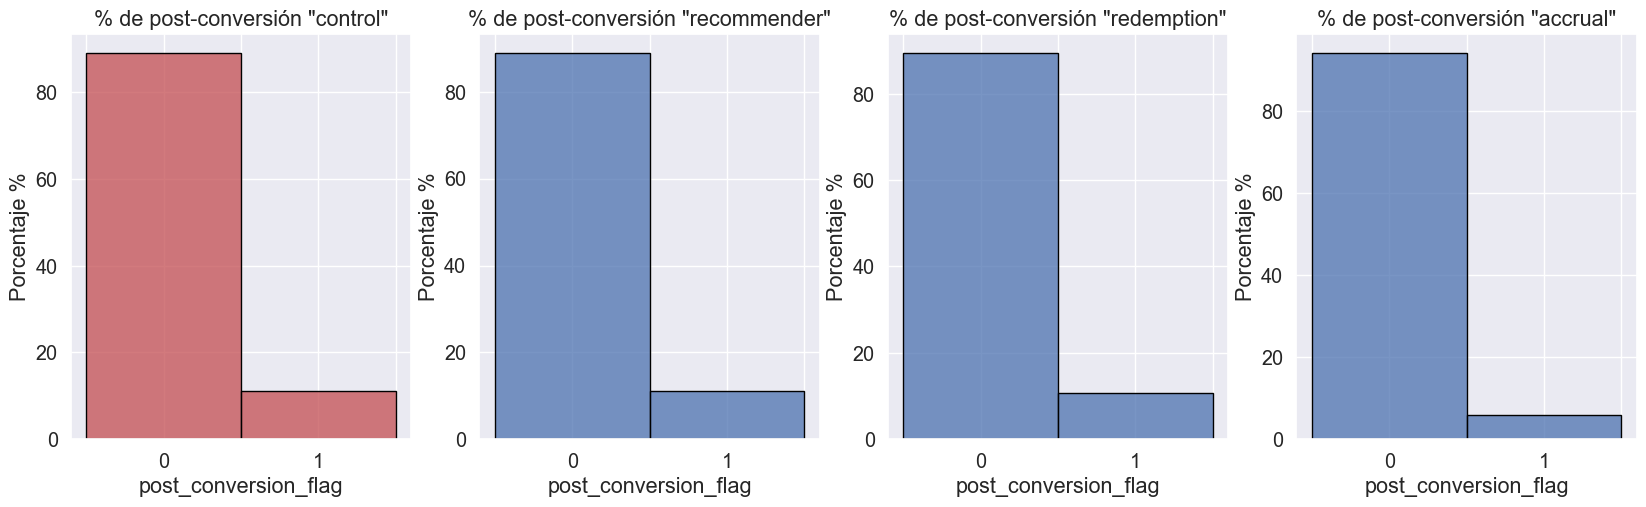

In [56]:
fig, axs = plt.subplots(1, 4, figsize=(18, 5), sharey=False)

sns.set_style("dark")

orden = ['control', 'recommender', 'redemption', 'accrual']

my_pal = {"control": "#ff0000", "recommender":"b", "redemption":"b", "accrual":"b"}

binary = [0,1]

####################################################################################################################

sns.histplot(x='post_conversion_flag', data=df_Latam[df_Latam['grupo']=='control'], 
             ax=axs[0], edgecolor='black', legend=False, stat='percent', discrete=True, color='r')

axs[0].set_title('% de post-conversión "control"')
axs[0].set_xticklabels(["","",0,"", 1])
axs[0].set(ylabel='Porcentaje %', xlabel='post_conversion_flag')
axs[0].grid(True)

####################################################################################################################

sns.histplot(x='post_conversion_flag', data=df_Latam[df_Latam['grupo']=='recommender'], 
             ax=axs[1], edgecolor='black', legend=False, stat='percent', discrete=True)

axs[1].set_title('% de post-conversión "recommender"')
axs[1].set_xticklabels(["","",0,"", 1])
axs[1].set(ylabel='Porcentaje %', xlabel='post_conversion_flag')
axs[1].grid(True)

####################################################################################################################

sns.histplot(x='post_conversion_flag', data=df_Latam[df_Latam['grupo']=='redemption'], 
             ax=axs[2], edgecolor='black', legend=False, stat='percent', discrete=True)

axs[2].set_title('% de post-conversión "redemption"')
axs[2].set_xticklabels(["","",0,"", 1])
axs[2].set(ylabel='Porcentaje %', xlabel='post_conversion_flag')
axs[2].grid(True)

####################################################################################################################

sns.histplot(x='post_conversion_flag', data=df_Latam[df_Latam['grupo']=='accrual'], 
             ax=axs[3], edgecolor='black', legend=False, stat='percent', discrete=True)

axs[3].set_title('% de post-conversión "accrual"')
axs[3].set_xticklabels(["","",0,"", 1])
axs[3].set(ylabel='Porcentaje %', xlabel='post_conversion_flag')
axs[3].grid(True)

####################################################################################################################

plt.show();

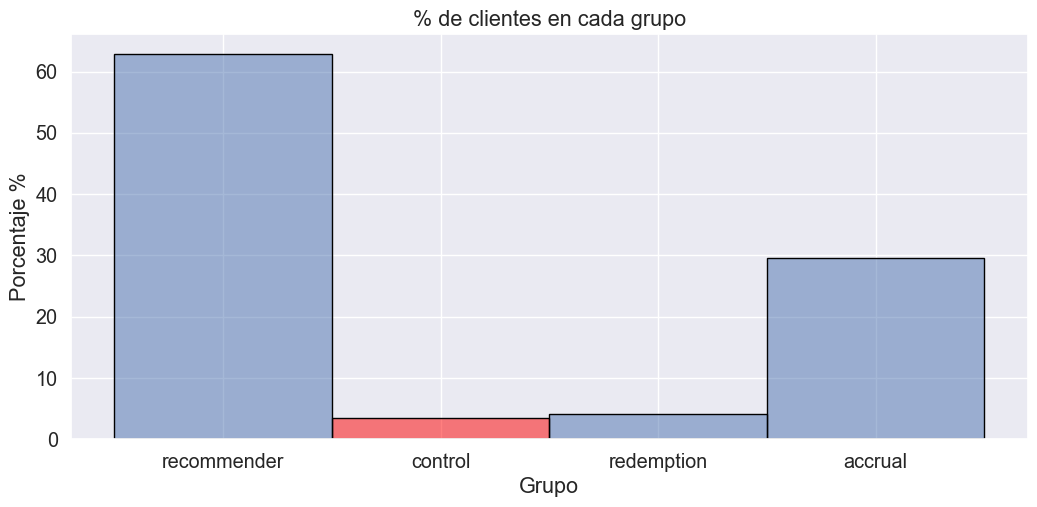

In [57]:
fig, ax = plt.subplots(figsize=(11, 5))

orden = ['control', 'recommender', 'redemption', 'accrual']

my_pal = {"control": "#ff0000", "recommender":"b", "redemption":"b", "accrual":"b"}

####################################################################################################################

sns.histplot(x='grupo', data=df_Latam, hue='grupo', 
             palette=my_pal, edgecolor='black', legend=False, stat='percent')
ax.set_title('% de clientes en cada grupo')
ax.set(ylabel='Porcentaje %', xlabel='Grupo')

plt.grid(True)

####################################################################################################################

plt.show();

In [58]:
df_Latam.groupby('grupo').describe()[['post_USD']].T

grupo                accrual      control   recommender   redemption
post_USD count   1520.000000   434.000000   8039.000000   533.000000
         mean     389.228714   251.749462    373.023402   380.193034
         std     1402.592447   491.231223    983.102132   687.548336
         min        0.258918     1.368000      0.090833     3.780207
         25%       16.478711    18.997803     35.992278    39.505179
         50%       78.449328    88.189143    113.554944   168.690600
         75%      259.528608   248.316624    323.249103   440.123904
         max    15985.521759  3679.187403  28249.960608  8294.676480

In [59]:
for i in ['redemption', 'recommender', 'accrual']:
    group2 = df_Latam[df_Latam['grupo'] == 'control']['post_USD'].dropna()
    group1 = df_Latam[df_Latam['grupo'] == i]['post_USD'].dropna()

    # Calcular la diferencia de medias
    mean1 = sum(group1) / len(group1)
    mean2 = sum(group2) / len(group2)
    mean_diff = mean1 - mean2

    # Realizar una prueba t de Student
    t_stat, p_value = stats.ttest_ind(group1, group2)

    # Verificar si el resultado es estadísticamente significativo
    alpha = 0.05  # Nivel de significancia
    if p_value < alpha:
        result = "Estadísticamente significativo"
    else:
        result = "No estadísticamente significativo"

    # Imprimir los resultados
    print(f'{i}:')
    print(f"Diferencia de medias: {mean_diff:.2f}")
    print(f"Valor p: {p_value:.4f}")
    print(f"Resultado: {result}\n\n")

redemption:
Diferencia de medias: 128.44
Valor p: 0.0011
Resultado: Estadísticamente significativo


recommender:
Diferencia de medias: 121.27
Valor p: 0.0107
Resultado: Estadísticamente significativo


accrual:
Diferencia de medias: 137.48
Valor p: 0.0449
Resultado: Estadísticamente significativo




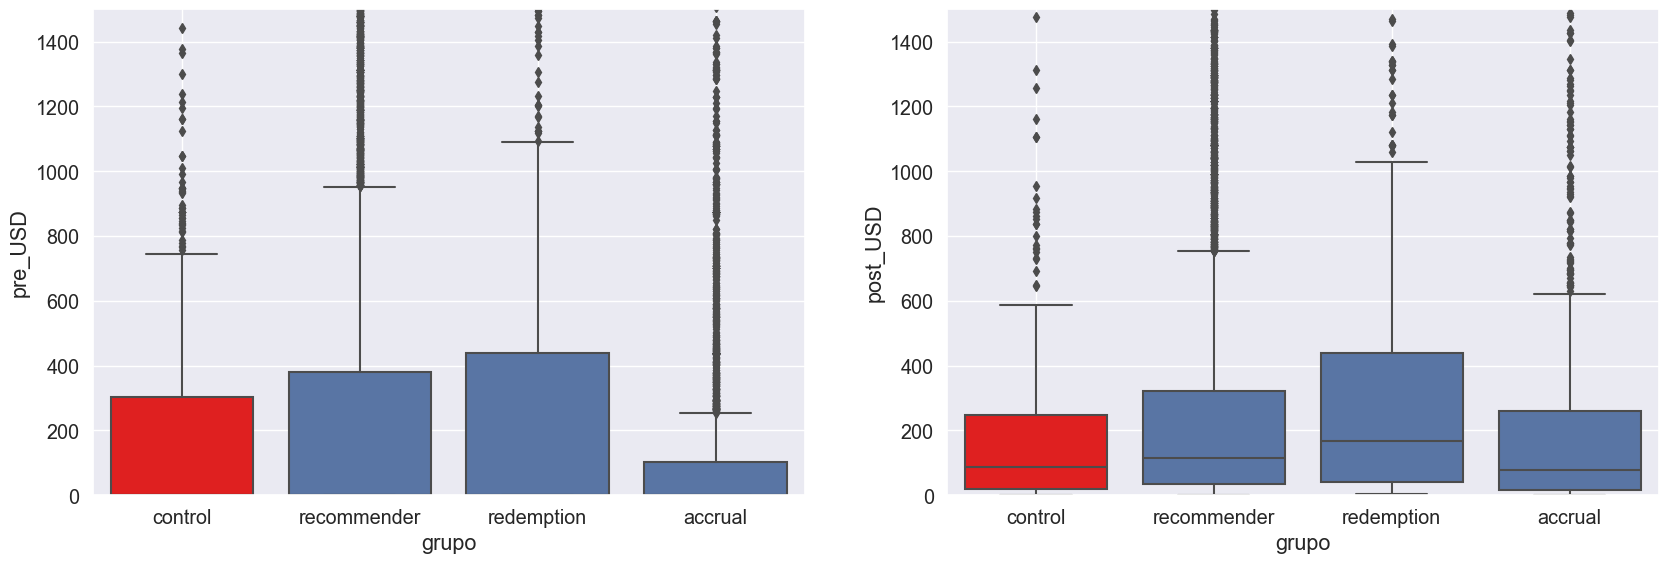

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

ylim = 1500

my_pal = {"control": "#ff0000", "recommender":"b", "redemption":"b", "accrual":"b"}

axs[0].set_ylim(0, ylim)
axs[1].set_ylim(0, ylim)

orden = ['control', 'recommender', 'redemption', 'accrual']

sns.boxplot(x='grupo', y='pre_USD', data=df_Latam, ax=axs[0], order=orden, palette=my_pal)
sns.boxplot(x='grupo', y='post_USD', data=df_Latam, ax=axs[1], order=orden, palette=my_pal)

axs[0].grid(True)
axs[1].grid(True)

plt.show();

In [61]:
df_Latam.groupby('grupo').describe()[['pre_n_trx']].T

grupo                accrual     control   recommender  redemption
pre_n_trx count  3662.000000  795.000000  14731.000000  919.000000
          mean      9.147187   11.773585     10.954110    9.351469
          std      12.915666   15.378239     14.341478   11.819792
          min       0.000000    0.000000      0.000000    0.000000
          25%       2.000000    2.000000      2.000000    1.000000
          50%       5.000000    7.000000      7.000000    5.000000
          75%      12.000000   15.000000     14.000000   13.000000
          max     132.000000  160.000000    352.000000  107.000000

In [62]:
df_Latam.groupby('grupo').describe()[['post_n_trx']].T

grupo                 accrual     control   recommender  redemption
post_n_trx count  3662.000000  795.000000  14731.000000  919.000000
           mean      1.472693    1.455346      1.475392    1.477693
           std       0.972550    1.321764      1.236244    1.194255
           min       1.000000    1.000000      1.000000    1.000000
           25%       1.000000    1.000000      1.000000    1.000000
           50%       1.000000    1.000000      1.000000    1.000000
           75%       2.000000    2.000000      2.000000    2.000000
           max      21.000000   24.000000     42.000000   18.000000

In [63]:
for i in ['redemption', 'recommender', 'accrual']:
    group2 = df_Latam[df_Latam['grupo'] == 'control']['post_n_trx'].dropna()
    group1 = df_Latam[df_Latam['grupo'] == i]['post_n_trx'].dropna()

    # Calcular la diferencia de medias
    mean1 = sum(group1) / len(group1)
    mean2 = sum(group2) / len(group2)
    mean_diff = mean1 - mean2

    # Realizar una prueba t de Student
    t_stat, p_value = stats.ttest_ind(group1, group2)

    # Verificar si el resultado es estadísticamente significativo
    alpha = 0.05  # Nivel de significancia
    if p_value < alpha:
        result = "Estadísticamente significativo"
    else:
        result = "No estadísticamente significativo"

    # Imprimir los resultados
    print(f'{i}:')
    print(f"Diferencia de medias: {mean_diff:.2f}")
    print(f"Valor p: {p_value:.4f}")
    print(f"Resultado: {result}\n\n")

redemption:
Diferencia de medias: 0.02
Valor p: 0.7132
Resultado: No estadísticamente significativo


recommender:
Diferencia de medias: 0.02
Valor p: 0.6572
Resultado: No estadísticamente significativo


accrual:
Diferencia de medias: 0.02
Valor p: 0.6709
Resultado: No estadísticamente significativo




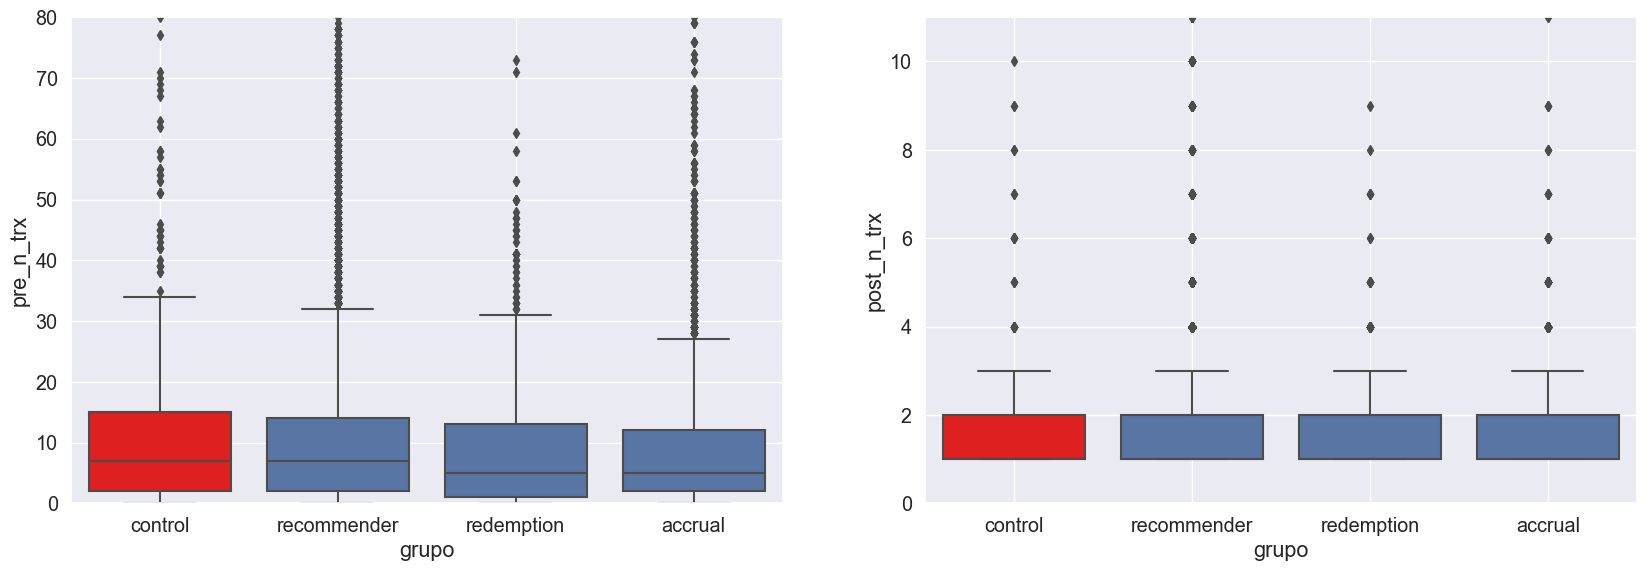

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

ylim = 150

axs[0].set_ylim(0, 80)
axs[1].set_ylim(0, 11)

orden = ['control', 'recommender', 'redemption', 'accrual']

sns.boxplot(x='grupo', y='pre_n_trx', data=df_Latam, ax=axs[0], order=orden, palette=my_pal)
sns.boxplot(x='grupo', y='post_n_trx', data=df_Latam, ax=axs[1], order=orden, palette=my_pal)

axs[0].grid(True)
axs[1].grid(True)

plt.show();

In [65]:
df_Latam.groupby('grupo').describe()[['post_puntos_LTM']].T

grupo                       accrual        control   recommender  \
post_puntos_LTM count  3.662000e+03     795.000000  1.473100e+04   
                mean   1.485868e+04    6734.718239  7.396150e+03   
                std    1.551642e+05   32256.401957  3.179954e+04   
                min    0.000000e+00       0.000000  0.000000e+00   
                25%    3.615000e+02       0.000000  0.000000e+00   
                50%    1.121000e+03    1068.000000  1.336000e+03   
                75%    4.361750e+03    5000.000000  5.246500e+03   
                max    3.277440e+06  597067.000000  1.390000e+06   

grupo                     redemption  
post_puntos_LTM count     919.000000  
                mean     9568.170838  
                std     29784.671032  
                min         0.000000  
                25%         0.000000  
                50%      1376.000000  
                75%      6274.000000  
                max    353522.000000

In [66]:
for i in ['control', 'recommender', 'redemption']:
    group2 = df_Latam[df_Latam['grupo'] == 'accrual']['pre_puntos_LTM'].dropna()
    group1 = df_Latam[df_Latam['grupo'] == i]['pre_puntos_LTM'].dropna()

    # Calcular la diferencia de medias
    mean1 = sum(group1) / len(group1)
    mean2 = sum(group2) / len(group2)
    mean_diff = mean1 - mean2

    # Realizar una prueba t de Student
    t_stat, p_value = stats.ttest_ind(group1, group2)

    # Verificar si el resultado es estadísticamente significativo
    alpha = 0.05  # Nivel de significancia
    if p_value < alpha:
        result = "Estadísticamente significativo"
    else:
        result = "No estadísticamente significativo"

    # Imprimir los resultados
    print(f'{i}:')
    print(f"Diferencia de medias: {mean_diff:.2f}")
    print(f"Valor p: {p_value:.4f}")
    print(f"Resultado: {result}\n\n")

control:
Diferencia de medias: 1480.67
Valor p: 0.8590
Resultado: No estadísticamente significativo


recommender:
Diferencia de medias: 11297.43
Valor p: 0.0073
Resultado: Estadísticamente significativo


redemption:
Diferencia de medias: 13422.92
Valor p: 0.0989
Resultado: No estadísticamente significativo




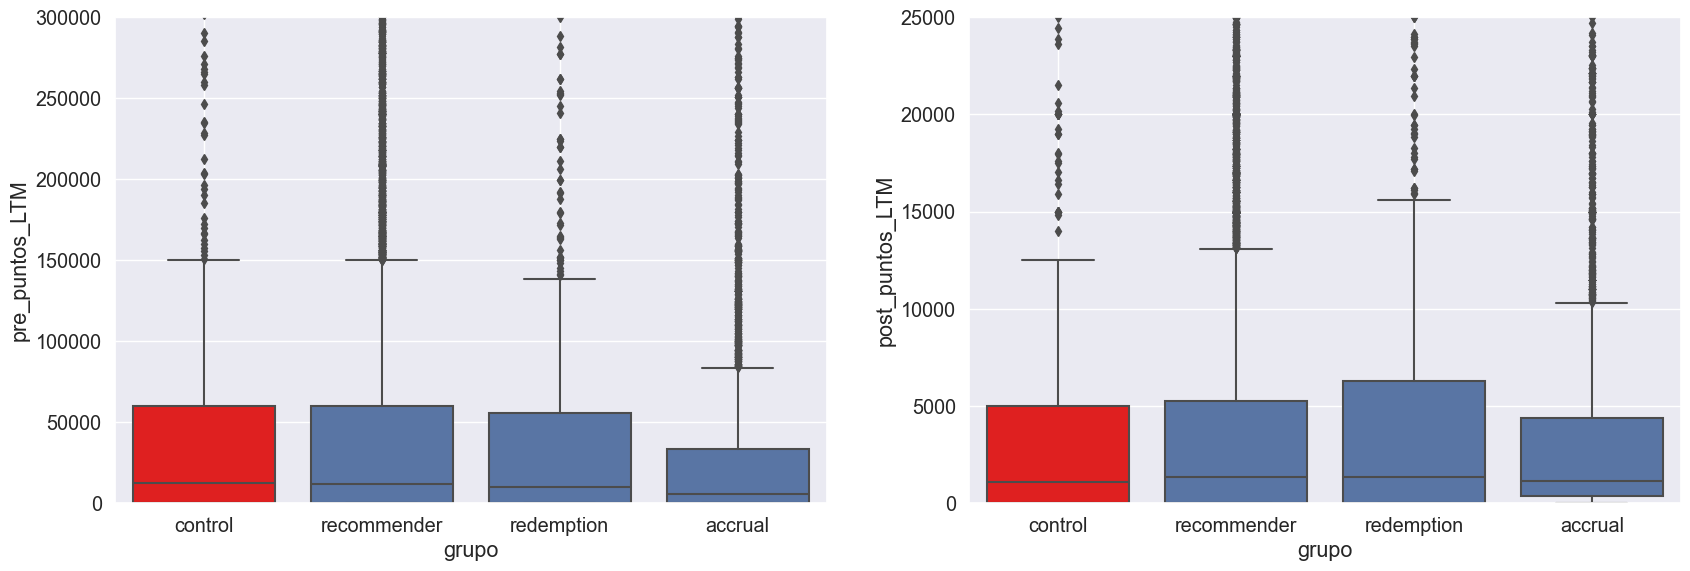

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

ylim = 150

axs[0].set_ylim(0, 300000)
axs[1].set_ylim(0, 25000)

orden = ['control', 'recommender', 'redemption', 'accrual']

sns.boxplot(x='grupo', y='pre_puntos_LTM', data=df_Latam, ax=axs[0], order=orden, palette=my_pal)
sns.boxplot(x='grupo', y='post_puntos_LTM', data=df_Latam, ax=axs[1], order=orden, palette=my_pal)

axs[0].grid(True)
axs[1].grid(True)

plt.show();

In [68]:
df_Latam.groupby('grupo').describe()[['pre_conversion_flag']].T

grupo                           accrual      control    recommender  \
pre_conversion_flag count  61962.000000  7210.000000  132098.000000   
                    mean       0.049256     0.092510       0.094453   
                    std        0.216404     0.289765       0.292458   
                    min        0.000000     0.000000       0.000000   
                    25%        0.000000     0.000000       0.000000   
                    50%        0.000000     0.000000       0.000000   
                    75%        0.000000     0.000000       0.000000   
                    max        1.000000     1.000000       1.000000   

grupo                       redemption  
pre_conversion_flag count  8621.000000  
                    mean      0.088621  
                    std       0.284212  
                    min       0.000000  
                    25%       0.000000  
                    50%       0.000000  
                    75%       0.000000  
                    max       1.000000

In [69]:
df_Latam.groupby('grupo').describe()[['post_conversion_flag']].T

grupo                            accrual      control    recommender  \
post_conversion_flag count  61962.000000  7210.000000  132098.000000   
                     mean       0.059101     0.110264       0.111516   
                     std        0.235815     0.313240       0.314771   
                     min        0.000000     0.000000       0.000000   
                     25%        0.000000     0.000000       0.000000   
                     50%        0.000000     0.000000       0.000000   
                     75%        0.000000     0.000000       0.000000   
                     max        1.000000     1.000000       1.000000   

grupo                        redemption  
post_conversion_flag count  8621.000000  
                     mean      0.106600  
                     std       0.308622  
                     min       0.000000  
                     25%       0.000000  
                     50%       0.000000  
                     75%       0.000000  
                     max       1.000000

In [70]:
for i in ['accrual', 'recommender', 'redemption']:
    group2 = df_Latam[df_Latam['grupo'] == 'control']['pre_conversion_flag'].dropna()
    group1 = df_Latam[df_Latam['grupo'] == i]['pre_conversion_flag'].dropna()

    # Calcular la diferencia de medias
    mean1 = sum(group1) / len(group1)
    mean2 = sum(group2) / len(group2)
    mean_diff = mean1 - mean2

    # Realizar una prueba t de Student
    t_stat, p_value = stats.ttest_ind(group1, group2)

    # Verificar si el resultado es estadísticamente significativo
    alpha = 0.05  # Nivel de significancia
    if p_value < alpha:
        result = "Estadísticamente significativo"
    else:
        result = "No estadísticamente significativo"

    # Imprimir los resultados
    print(f'{i}:')
    print(f"Diferencia de medias: {mean_diff:.2f}")
    print(f"Valor p: {p_value:.4f}")
    print(f"Resultado: {result}\n\n")

accrual:
Diferencia de medias: -0.04
Valor p: 0.0000
Resultado: Estadísticamente significativo


recommender:
Diferencia de medias: 0.00
Valor p: 0.5828
Resultado: No estadísticamente significativo


redemption:
Diferencia de medias: -0.00
Valor p: 0.3954
Resultado: No estadísticamente significativo




In [146]:
df_Latam[df_Latam['pre_conversion_flag']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192931 entries, 0 to 209890
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   CAMPAIGN_NAME         192931 non-null  object        
 1   campaign_id           171732 non-null  float64       
 2   campaign_date_start   192931 non-null  datetime64[ns]
 3   campaign_date_end     192931 non-null  datetime64[ns]
 4   audience_id           192931 non-null  int64         
 5   grupo                 192931 non-null  object        
 6   learning_group_flg    192931 non-null  int64         
 7   grupo_augmented       192931 non-null  object        
 8   open_date             73834 non-null   datetime64[ns]
 9   open_flag             192931 non-null  int64         
 10  click_date            3108 non-null    datetime64[ns]
 11  click_flag            192931 non-null  int64         
 12  promotion_name        192931 non-null  object        
 13 

In [159]:
df_Latam.groupby(['grupo', 'pre_conversion_flag']).post_USD.mean()

grupo        pre_conversion_flag
accrual      0                      688.491087
             1                      295.676918
control      0                      452.587864
             1                      193.941376
recommender  0                      513.754229
             1                      334.433398
redemption   0                      511.612238
             1                      341.596617
Name: post_USD, dtype: float64

In [152]:
df_Latam.groupby(['grupo', 'pre_conversion_flag']).post_puntos_LTM.mean()

grupo        pre_conversion_flag
accrual      0                      24977.603279
             1                      12836.227392
control      0                      11636.054688
             1                       5794.131934
recommender  0                       8793.051464
             1                       7143.796906
redemption   0                      15482.916129
             1                       8368.189791
Name: post_puntos_LTM, dtype: float64

In [176]:
for i in ['accrual', 'control', 'redemption']:
    group2 = df_Latam[(df_Latam['grupo'] == 'recommender')].query("pre_conversion_flag == 0")['post_USD'].dropna()
    group1 = df_Latam[df_Latam['grupo'] == i].query("pre_conversion_flag == 0")['post_USD'].dropna()

    # Calcular la diferencia de medias
    mean1 = sum(group1) / len(group1)
    mean2 = sum(group2) / len(group2)
    mean_diff = mean1 - mean2

    # Realizar una prueba t de Student
    t_stat, p_value = stats.ttest_ind(group1, group2)

    # Verificar si el resultado es estadísticamente significativo
    alpha = 0.05  # Nivel de significancia
    if p_value < alpha:
        result = "Estadísticamente significativo"
    else:
        result = "No estadísticamente significativo"

    # Imprimir los resultados
    print(f'{i}:')
    print(f"Diferencia de medias: {mean_diff:.2f}")
    print(f"Valor p: {p_value:.4f}")
    print(f"Resultado: {result}\n\n")

accrual:
Diferencia de medias: 174.74
Valor p: 0.0063
Resultado: Estadísticamente significativo


control:
Diferencia de medias: -61.17
Valor p: 0.5285
Resultado: No estadísticamente significativo


redemption:
Diferencia de medias: -2.14
Valor p: 0.9803
Resultado: No estadísticamente significativo




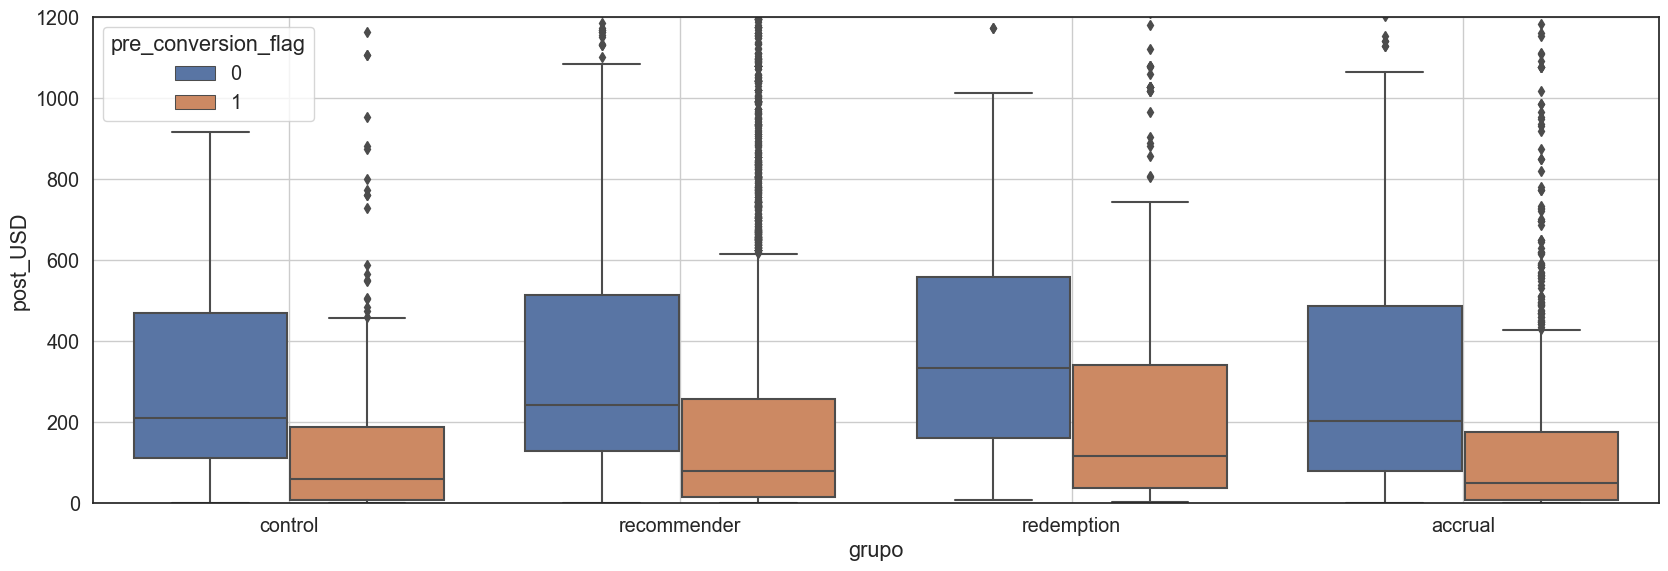

In [170]:
fig, axs = plt.subplots(1, 1, figsize=(18, 6))

ylim = 150

axs.set_ylim(0, 1200)

orden = ['control', 'recommender', 'redemption', 'accrual']

sns.boxplot(x='grupo', y='post_USD', data=df_Latam, hue='pre_conversion_flag', order=orden)

axs.grid(True)

plt.show();

In [134]:
df_Latam.groupby('grupo')[['pre_puntos_LTM', 'post_conversion_flag']].mean()

pre_puntos_LTM  post_conversion_flag
grupo                                            
accrual        57261.107318              0.059101
control        58741.779874              0.110264
recommender    68558.533297              0.111516
redemption     70684.023939              0.106600

# Propensity Score Matching

## pymatch

In [71]:
control = df_Latam_clean[df_Latam_clean['grupo'] == 'control'].drop(columns=[
    'post_open_flag', 'post_click_flag', 'post_conversion_flag', 'grupo', 'product',
    'post_n_trx', 'post_USD', 'post_income_amt','post_puntos_LTM', 'open_date', 'click_date'])

control['treatment'] = 0



treatment = df_Latam_clean[df_Latam_clean['grupo'] == 'recommender'].drop(columns=[
    'post_open_flag', 'post_click_flag', 'post_conversion_flag', 'grupo', 'product',
    'post_n_trx', 'post_USD', 'post_income_amt','post_puntos_LTM', 'open_date', 'click_date'])

treatment['treatment'] = 1

In [72]:
print(control.shape)
print(control.isnull().sum())

(7210, 11)
learning_group_flg        0
open_flag                 0
click_flag                0
pre_open_flag          6415
pre_click_flag         6415
pre_conversion_flag    6415
pre_n_trx              6415
pre_USD                6415
pre_income_amt         6415
pre_puntos_LTM         6415
treatment                 0
dtype: int64


In [73]:
print(treatment.shape)
print(treatment.isnull().sum())

(132098, 11)
learning_group_flg          0
open_flag                   0
click_flag                  0
pre_open_flag          117367
pre_click_flag         117367
pre_conversion_flag    117367
pre_n_trx              117367
pre_USD                117367
pre_income_amt         117367
pre_puntos_LTM         117367
treatment                   0
dtype: int64


In [74]:
print(treatment.shape[0] - treatment.isnull().sum()[5]) # n majority son la muestra de tratamiento no nulas.
print(control.shape[0] - control.isnull().sum()[5]) # n minority son la muestra de control no nulas.

14731
795


In [75]:
treatment.dropna(inplace=True)
control.dropna(inplace=True)

In [76]:
m = Matcher(treatment, control, yvar="treatment", exclude=[]) 
# n minority no cambia si uso el df completo (original)

Formula:
treatment ~ learning_group_flg+open_flag+click_flag+pre_open_flag+pre_click_flag+pre_conversion_flag+pre_n_trx+pre_USD+pre_income_amt+pre_puntos_LTM
n majority: 14731
n minority: 795


In [77]:
# for reproducibility
np.random.seed(20170925)

#m.fit_scores(balance=True, nmodels=1500)

## PsmPy

### recommender

In [177]:
control = df_Latam_clean[df_Latam_clean['grupo'] == 'control'].drop(columns=[
    'post_open_flag', 'post_click_flag', 'post_conversion_flag', 'grupo', 'product',
    'post_n_trx', 'post_USD', 'post_income_amt','post_puntos_LTM', 'open_date', 'click_date'])

control['treatment'] = 0



treatment = df_Latam_clean[df_Latam_clean['grupo'] == 'recommender'].drop(columns=[
    'post_open_flag', 'post_click_flag', 'post_conversion_flag', 'grupo', 'product',
    'post_n_trx', 'post_USD', 'post_income_amt','post_puntos_LTM', 'open_date', 'click_date'])

treatment['treatment'] = 1

treatment.dropna(inplace=True)
control.dropna(inplace=True)

In [178]:
psm_df = pd.concat([control, treatment], axis=0).reset_index()
psm_df

index  learning_group_flg  open_flag  click_flag  pre_open_flag  \
0         116                   0          0           0            0.0   
1         426                   0          0           0            0.0   
2         637                   0          0           0            0.0   
3         923                   0          0           0            0.0   
4        1012                   0          0           0            0.0   
...       ...                 ...        ...         ...            ...   
15521  209839                   0          1           0            1.0   
15522  209853                   0          0           0            0.0   
15523  209857                   0          0           0            0.0   
15524  209873                   0          1           0            1.0   
15525  209887                   0          1           0            1.0   

       pre_click_flag  pre_conversion_flag  pre_n_trx     pre_USD  \
0                 0.0                  0.0        0.0    0.000000   
1                 0.0                  1.0        2.0  137.620800   
2                 0.0                  1.0        3.0    0.000000   
3                 0.0                  1.0        2.0    0.000000   
4                 0.0                  1.0        5.0    0.000000   
...               ...                  ...        ...         ...   
15521             0.0                  1.0        7.0    0.000000   
15522             0.0                  1.0        6.0    0.000000   
15523             0.0                  1.0        7.0  257.051223   
15524             0.0                  1.0       21.0    0.000000   
15525             0.0                  1.0        1.0   97.321500   

       pre_income_amt  pre_puntos_LTM  treatment  
0              0.0000             0.0          0  
1            724.3200             0.0          0  
2              0.0000          5210.0          0  
3              0.0000            92.0          0  
4              0.0000         11984.0          0  
...               ...             ...        ...  
15521          0.0000          2264.0          1  
15522          0.0000          2590.0          1  
15523       1321.7050         35000.0          1  
15524          0.0000         34538.0          1  
15525         97.3215         15000.0          1  

[15526 rows x 12 columns]

In [179]:
psm = PsmPy(psm_df, treatment='treatment', indx='index', exclude = [])
psm.logistic_ps(balance = True)
psm.predicted_data

index  learning_group_flg  open_flag  click_flag  pre_open_flag  \
0         116                   0          0           0            0.0   
1         426                   0          0           0            0.0   
2         637                   0          0           0            0.0   
3         923                   0          0           0            0.0   
4        1012                   0          0           0            0.0   
...       ...                 ...        ...         ...            ...   
15521  209839                   0          1           0            1.0   
15522  209853                   0          0           0            0.0   
15523  209857                   0          0           0            0.0   
15524  209873                   0          1           0            1.0   
15525  209887                   0          1           0            1.0   

       pre_click_flag  pre_conversion_flag  pre_n_trx     pre_USD  \
0                 0.0                  0.0        0.0    0.000000   
1                 0.0                  1.0        2.0  137.620800   
2                 0.0                  1.0        3.0    0.000000   
3                 0.0                  1.0        2.0    0.000000   
4                 0.0                  1.0        5.0    0.000000   
...               ...                  ...        ...         ...   
15521             0.0                  1.0        7.0    0.000000   
15522             0.0                  1.0        6.0    0.000000   
15523             0.0                  1.0        7.0  257.051223   
15524             0.0                  1.0       21.0    0.000000   
15525             0.0                  1.0        1.0   97.321500   

       pre_income_amt  pre_puntos_LTM  propensity_score  propensity_logit  \
0              0.0000             0.0          0.411811         -0.356483   
1            724.3200             0.0          0.385448         -0.466486   
2              0.0000          5210.0          0.385358         -0.466869   
3              0.0000            92.0          0.387011         -0.459893   
4              0.0000         11984.0          0.381880         -0.481578   
...               ...             ...               ...               ...   
15521          0.0000          2264.0          0.988146          4.423154   
15522          0.0000          2590.0          0.374489         -0.513005   
15523       1321.7050         35000.0          0.358614         -0.581384   
15524          0.0000         34538.0          0.978649          3.825069   
15525         97.3215         15000.0          0.990358          4.631902   

       treatment  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
15521          1  
15522          1  
15523          1  
15524          1  
15525          1  

[15526 rows x 14 columns]

In [127]:
psm.knn_matched(matcher='propensity_score', replacement=False, caliper=None)

In [180]:
psm.knn_matched_12n(matcher='propensity_score', how_many=3)

In [181]:
psm.df_matched

index  learning_group_flg  open_flag  click_flag  pre_open_flag  \
0        116                   0          0           0            0.0   
1        426                   0          0           0            0.0   
2        637                   0          0           0            0.0   
3        923                   0          0           0            0.0   
4       1012                   0          0           0            0.0   
...      ...                 ...        ...         ...            ...   
3175  130996                   0          0           0            0.0   
3176   75047                   0          0           0            0.0   
3177  174873                   0          0           0            0.0   
3178  142955                   0          0           0            0.0   
3179  192732                   0          0           0            0.0   

      pre_click_flag  pre_conversion_flag  pre_n_trx      pre_USD  \
0                0.0                  0.0        0.0     0.000000   
1                0.0                  1.0        2.0   137.620800   
2                0.0                  1.0        3.0     0.000000   
3                0.0                  1.0        2.0     0.000000   
4                0.0                  1.0        5.0     0.000000   
...              ...                  ...        ...          ...   
3175             0.0                  1.0        5.0   530.734752   
3176             0.0                  1.0        3.0   211.981998   
3177             0.0                  1.0        9.0   347.584979   
3178             0.0                  1.0       42.0  1665.481962   
3179             0.0                  1.0       18.0  3281.903136   

      pre_income_amt  pre_puntos_LTM  propensity_score  propensity_logit  \
0             0.0000             0.0          0.411811         -0.356483   
1           724.3200             0.0          0.385448         -0.466486   
2             0.0000          5210.0          0.385358         -0.466869   
3             0.0000            92.0          0.387011         -0.459893   
4             0.0000         11984.0          0.381880         -0.481578   
...              ...             ...               ...               ...   
3175       2793.3408             0.0          0.351528         -0.612331   
3176       1071.0000         30000.0          0.424273         -0.305256   
3177       1752.6000         65500.0          0.351503         -0.612438   
3178       8611.2020        281270.0          0.351482         -0.612529   
3179      17273.1744             0.0          0.351466         -0.612600   

      treatment  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
3175          1  
3176          1  
3177          1  
3178          1  
3179          1  

[3180 rows x 14 columns]

In [182]:
psm.df_matched['treatment'].value_counts()

1    2385
0     795
Name: treatment, dtype: int64

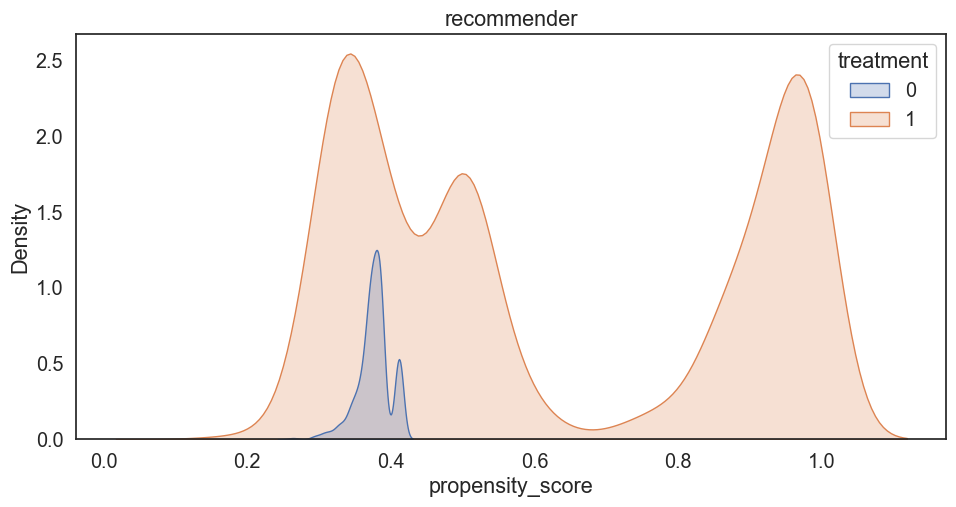

In [184]:
sns.kdeplot(data=psm.predicted_data, x='propensity_score', hue='treatment', fill=True)
plt.title('recommender');

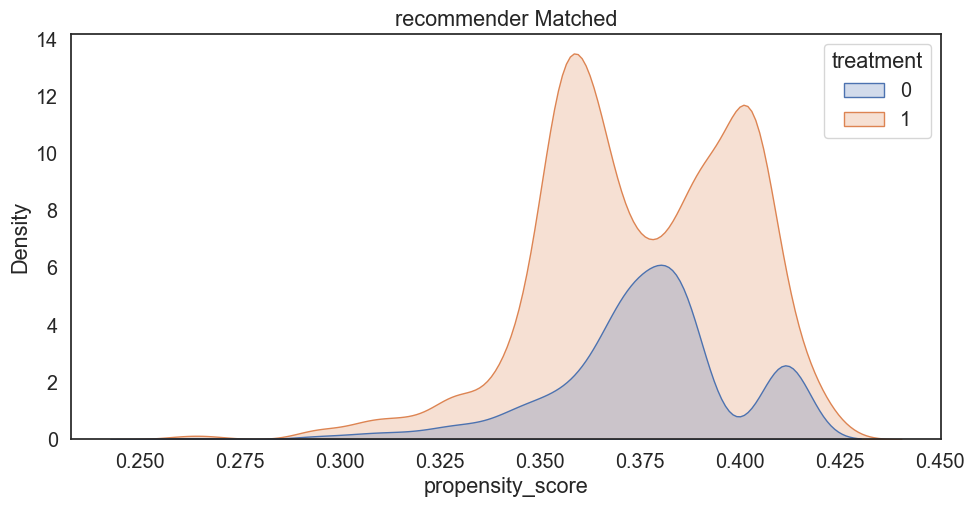

In [185]:
sns.kdeplot(data=psm.df_matched, x='propensity_score', hue='treatment', fill=True)
plt.title('recommender Matched');

In [186]:
psm.matched_ids

index  largerclass_0group  largerclass_1group  largerclass_2group
0       116              144314              143290              142967
1       426                8026              141378              103391
2       637               80938                7895              185667
3       923              183230              160491               75787
4      1012               73758              140894              170882
..      ...                 ...                 ...                 ...
790  208980               73824                4348              199978
791  209117              189628              115860               73300
792  209118              199987              170826              198950
793  209303              195069              130996               75047
794  209324              174873              142955              192732

[795 rows x 4 columns]

In [89]:
psm.matched_ids[psm.matched_ids['index'] == 96062]

index  matched_ID
164  96062      116092

In [90]:
psm.matched_ids.iloc[164].values

array([ 96062, 116092], dtype=int64)

In [91]:
df_Latam_clean.iloc[psm.matched_ids.iloc[4].values]

grupo  learning_group_flg open_date  open_flag click_date  \
1012        control                   0       NaT          0        NaT   
141378  recommender                   0       NaT          0        NaT   

        click_flag product  post_open_flag  post_click_flag  \
1012             0     ALC             0.0              0.0   
141378           0     ALC             0.0              0.0   

        post_conversion_flag  post_n_trx  post_USD  post_income_amt  \
1012                     1.0         1.0       NaN              NaN   
141378                   1.0         1.0  7.901036           37.763   

        post_puntos_LTM  pre_open_flag  pre_click_flag  pre_conversion_flag  \
1012              786.0            0.0             0.0                  1.0   
141378           1000.0            0.0             0.0                  1.0   

        pre_n_trx     pre_USD  pre_income_amt  pre_puntos_LTM  
1012          5.0    0.000000           0.000         11984.0  
141378       16.0  188.052224         554.166         24066.0

In [92]:
df_Latam_clean.iloc[psm.matched_ids.iloc[169].values]

grupo  learning_group_flg open_date  open_flag click_date  \
96620       control                   1       NaT          0        NaT   
129042  recommender                   0       NaT          0        NaT   

        click_flag product  post_open_flag  post_click_flag  \
96620            0     ALC             0.0              0.0   
129042           0     ALC             0.0              0.0   

        post_conversion_flag  post_n_trx   post_USD  post_income_amt  \
96620                    1.0         1.0        NaN              NaN   
129042                   1.0         1.0  39.505179          188.815   

        post_puntos_LTM  pre_open_flag  pre_click_flag  pre_conversion_flag  \
96620           41987.0            0.0             0.0                  1.0   
129042           5000.0            0.0             0.0                  1.0   

        pre_n_trx     pre_USD  pre_income_amt  pre_puntos_LTM  
96620         6.0    0.000000            0.00         46039.0  
129042       13.0  437.740637         2265.78         61012.0

In [93]:
psm.effect_size

Variable matching  Effect Size
0    learning_group_flg   before     0.377318
1    learning_group_flg    after     0.177019
2             open_flag   before     0.989806
3             open_flag    after     0.050157
4            click_flag   before     0.209500
5            click_flag    after     0.100504
6         pre_open_flag   before     0.906366
7         pre_open_flag    after     0.050157
8        pre_click_flag   before     0.210057
9        pre_click_flag    after     0.100504
10  pre_conversion_flag   before     0.022185
11  pre_conversion_flag    after     0.096779
12            pre_n_trx   before     0.056923
13            pre_n_trx    after     0.148229
14              pre_USD   before     0.049868
15              pre_USD    after     0.038336
16       pre_income_amt   before     0.048329
17       pre_income_amt    after     0.037294
18       pre_puntos_LTM   before     0.043309
19       pre_puntos_LTM    after     0.159307

In [94]:
psm.treatmentdf

learning_group_flg  open_flag  click_flag  pre_open_flag  \
index                                                              
26                       0          1           0            1.0   
118                      0          0           0            0.0   
134                      0          0           0            0.0   
176                      0          1           0            1.0   
183                      0          1           0            1.0   
...                    ...        ...         ...            ...   
209839                   0          1           0            1.0   
209853                   0          0           0            0.0   
209857                   0          0           0            0.0   
209873                   0          1           0            1.0   
209887                   0          1           0            1.0   

        pre_click_flag  pre_conversion_flag  pre_n_trx     pre_USD  \
index                                                                
26                 0.0                  1.0        2.0  529.432416   
118                0.0                  1.0        8.0    0.000000   
134                0.0                  1.0       24.0    0.000000   
176                0.0                  1.0        3.0    0.000000   
183                0.0                  1.0        1.0    0.000000   
...                ...                  ...        ...         ...   
209839             0.0                  1.0        7.0    0.000000   
209853             0.0                  1.0        6.0    0.000000   
209857             0.0                  1.0        7.0  257.051223   
209873             0.0                  1.0       21.0    0.000000   
209887             0.0                  1.0        1.0   97.321500   

        pre_income_amt  pre_puntos_LTM  treatment  
index                                              
26           2786.4864             0.0          1  
118             0.0000         15503.0          1  
134             0.0000         36829.0          1  
176             0.0000          8838.0          1  
183             0.0000           448.0          1  
...                ...             ...        ...  
209839          0.0000          2264.0          1  
209853          0.0000          2590.0          1  
209857       1321.7050         35000.0          1  
209873          0.0000         34538.0          1  
209887         97.3215         15000.0          1  

[14731 rows x 11 columns]

### accrual

In [187]:
control = df_Latam_clean[df_Latam_clean['grupo'] == 'control'].drop(columns=[
    'post_open_flag', 'post_click_flag', 'post_conversion_flag', 'grupo', 'product',
    'post_n_trx', 'post_USD', 'post_income_amt','post_puntos_LTM', 'open_date', 'click_date'])

control['treatment'] = 0

treatment = df_Latam_clean[df_Latam_clean['grupo'] == 'accrual'].drop(columns=[
    'post_open_flag', 'post_click_flag', 'post_conversion_flag', 'grupo', 'product',
    'post_n_trx', 'post_USD', 'post_income_amt','post_puntos_LTM', 'open_date', 'click_date'])

treatment['treatment'] = 1

In [188]:
treatment.dropna(inplace=True)
control.dropna(inplace=True)

In [189]:
psm_df = pd.concat([control, treatment], axis=0).reset_index()
psm_df

index  learning_group_flg  open_flag  click_flag  pre_open_flag  \
0       116                   0          0           0            0.0   
1       426                   0          0           0            0.0   
2       637                   0          0           0            0.0   
3       923                   0          0           0            0.0   
4      1012                   0          0           0            0.0   
...     ...                 ...        ...         ...            ...   
4452  71712                   0          0           0            0.0   
4453  71713                   0          0           0            0.0   
4454  71719                   0          0           0            0.0   
4455  71723                   0          0           0            0.0   
4456  71727                   0          0           0            0.0   

      pre_click_flag  pre_conversion_flag  pre_n_trx     pre_USD  \
0                0.0                  0.0        0.0     0.00000   
1                0.0                  1.0        2.0   137.62080   
2                0.0                  1.0        3.0     0.00000   
3                0.0                  1.0        2.0     0.00000   
4                0.0                  1.0        5.0     0.00000   
...              ...                  ...        ...         ...   
4452             0.0                  1.0       19.0  2833.48368   
4453             0.0                  1.0       11.0     0.00000   
4454             0.0                  1.0       30.0     0.00000   
4455             0.0                  1.0        1.0     0.00000   
4456             0.0                  0.0        0.0     0.00000   

      pre_income_amt  pre_puntos_LTM  treatment  
0              0.000             0.0          0  
1            724.320             0.0          0  
2              0.000          5210.0          0  
3              0.000            92.0          0  
4              0.000         11984.0          0  
...              ...             ...        ...  
4452       14913.072             0.0          1  
4453           0.000         13114.0          1  
4454           0.000        215982.0          1  
4455           0.000           184.0          1  
4456           0.000             0.0          1  

[4457 rows x 12 columns]

In [190]:
psm = PsmPy(psm_df, treatment='treatment', indx='index', exclude = [])
psm.logistic_ps(balance = True)
psm.predicted_data

index  learning_group_flg  open_flag  click_flag  pre_open_flag  \
0       116                   0          0           0            0.0   
1       426                   0          0           0            0.0   
2       637                   0          0           0            0.0   
3       923                   0          0           0            0.0   
4      1012                   0          0           0            0.0   
...     ...                 ...        ...         ...            ...   
4452  71712                   0          0           0            0.0   
4453  71713                   0          0           0            0.0   
4454  71719                   0          0           0            0.0   
4455  71723                   0          0           0            0.0   
4456  71727                   0          0           0            0.0   

      pre_click_flag  pre_conversion_flag  pre_n_trx     pre_USD  \
0                0.0                  0.0        0.0     0.00000   
1                0.0                  1.0        2.0   137.62080   
2                0.0                  1.0        3.0     0.00000   
3                0.0                  1.0        2.0     0.00000   
4                0.0                  1.0        5.0     0.00000   
...              ...                  ...        ...         ...   
4452             0.0                  1.0       19.0  2833.48368   
4453             0.0                  1.0       11.0     0.00000   
4454             0.0                  1.0       30.0     0.00000   
4455             0.0                  1.0        1.0     0.00000   
4456             0.0                  0.0        0.0     0.00000   

      pre_income_amt  pre_puntos_LTM  propensity_score  propensity_logit  \
0              0.000             0.0          0.433435         -0.267851   
1            724.320             0.0          0.399409         -0.407930   
2              0.000          5210.0          0.417707         -0.332193   
3              0.000            92.0          0.420509         -0.320686   
4              0.000         11984.0          0.392217         -0.438002   
...              ...             ...               ...               ...   
4452       14913.072             0.0          0.510609          0.042443   
4453           0.000         13114.0          0.493437         -0.026253   
4454           0.000        215982.0          0.397425         -0.416207   
4455           0.000           184.0          0.499891         -0.000435   
4456           0.000             0.0          0.500003          0.000013   

      treatment  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
4452          1  
4453          1  
4454          1  
4455          1  
4456          1  

[4457 rows x 14 columns]

In [99]:
psm.knn_matched(matcher='propensity_score', replacement=False, caliper=None)

In [191]:
psm.knn_matched_12n(matcher='propensity_score', how_many=3)

In [192]:
psm.df_matched

index  learning_group_flg  open_flag  click_flag  pre_open_flag  \
0       116                   0          0           0            0.0   
1       426                   0          0           0            0.0   
2       637                   0          0           0            0.0   
3       923                   0          0           0            0.0   
4      1012                   0          0           0            0.0   
...     ...                 ...        ...         ...            ...   
3175  17034                   0          0           0            0.0   
3176  10706                   0          1           0            1.0   
3177  71637                   0          0           0            0.0   
3178  68654                   0          0           0            0.0   
3179  17894                   1          1           0            1.0   

      pre_click_flag  pre_conversion_flag  pre_n_trx      pre_USD  \
0                0.0                  0.0        0.0     0.000000   
1                0.0                  1.0        2.0   137.620800   
2                0.0                  1.0        3.0     0.000000   
3                0.0                  1.0        2.0     0.000000   
4                0.0                  1.0        5.0     0.000000   
...              ...                  ...        ...          ...   
3175             0.0                  1.0        9.0   901.079873   
3176             0.0                  1.0       10.0   867.548502   
3177             0.0                  1.0        9.0  1147.965408   
3178             0.0                  1.0        2.0  1193.902848   
3179             0.0                  1.0       19.0     0.000000   

      pre_income_amt  pre_puntos_LTM  propensity_score  propensity_logit  \
0             0.0000             0.0          0.433435         -0.267851   
1           724.3200             0.0          0.399409         -0.407930   
2             0.0000          5210.0          0.417707         -0.332193   
3             0.0000            92.0          0.420509         -0.320686   
4             0.0000         11984.0          0.392217         -0.438002   
...              ...             ...               ...               ...   
3175       4814.3410        201000.0          0.504038          0.016151   
3176       4404.5000        174426.0          0.504265          0.017059   
3177       6041.9232             0.0          0.504267          0.017068   
3178       6283.6992             0.0          0.504639          0.018557   
3179          0.0000        328158.0          0.505424          0.021698   

      treatment  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
3175          1  
3176          1  
3177          1  
3178          1  
3179          1  

[3180 rows x 14 columns]

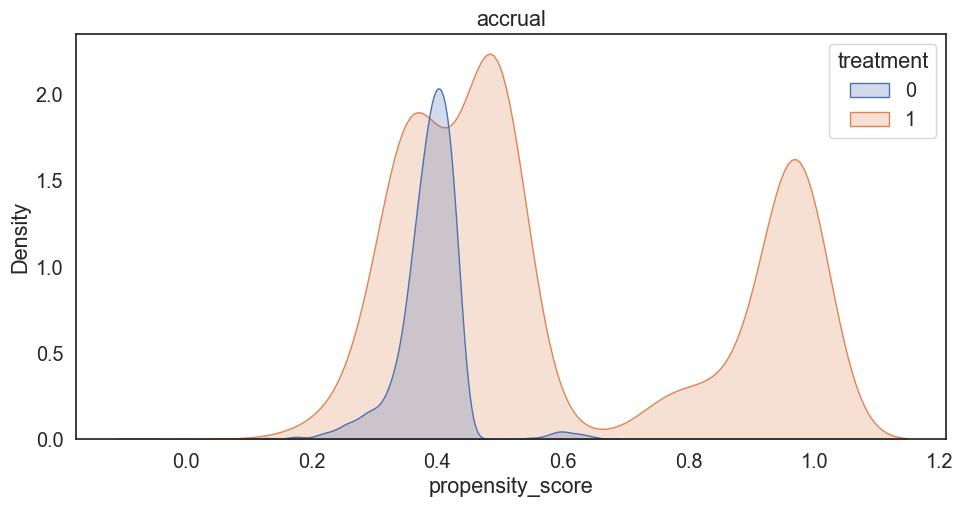

In [193]:
sns.kdeplot(data=psm.predicted_data, x='propensity_score', hue='treatment', fill=True)
plt.title('accrual');

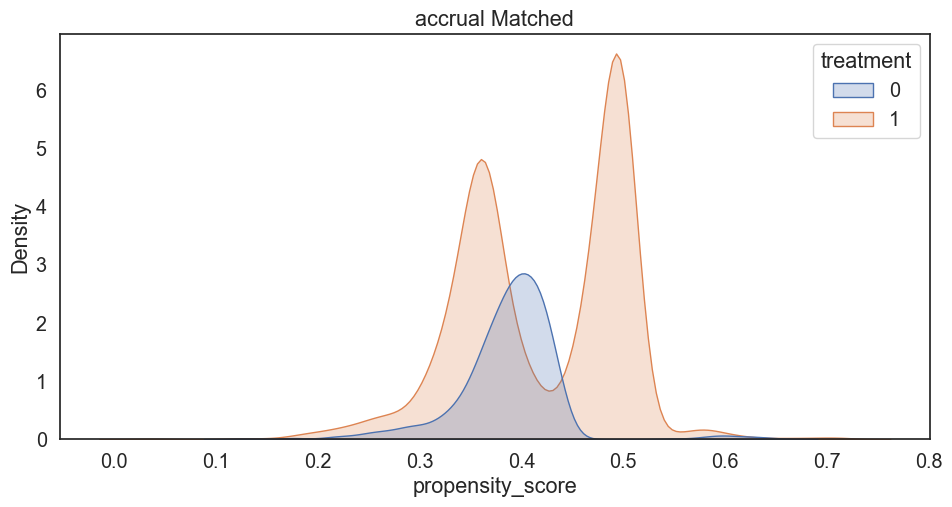

In [194]:
sns.kdeplot(data=psm.df_matched, x='propensity_score', hue='treatment', fill=True)
plt.title('accrual Matched');

### redemption

In [195]:
control = df_Latam_clean[df_Latam_clean['grupo'] == 'control'].drop(columns=[
    'post_open_flag', 'post_click_flag', 'post_conversion_flag', 'grupo', 'product',
    'post_n_trx', 'post_USD', 'post_income_amt','post_puntos_LTM', 'open_date', 'click_date'])

control['treatment'] = 0



treatment = df_Latam_clean[df_Latam_clean['grupo'] == 'redemption'].drop(columns=[
    'post_open_flag', 'post_click_flag', 'post_conversion_flag', 'grupo', 'product',
    'post_n_trx', 'post_USD', 'post_income_amt','post_puntos_LTM', 'open_date', 'click_date'])

treatment['treatment'] = 1

In [196]:
treatment.dropna(inplace=True)
control.dropna(inplace=True)

psm_df = pd.concat([control, treatment], axis=0).reset_index()
psm_df

index  learning_group_flg  open_flag  click_flag  pre_open_flag  \
0        116                   0          0           0            0.0   
1        426                   0          0           0            0.0   
2        637                   0          0           0            0.0   
3        923                   0          0           0            0.0   
4       1012                   0          0           0            0.0   
...      ...                 ...        ...         ...            ...   
1709  207478                   0          1           0            1.0   
1710  207485                   0          0           0            0.0   
1711  208386                   0          0           0            0.0   
1712  208581                   0          0           0            0.0   
1713  209741                   0          1           0            1.0   

      pre_click_flag  pre_conversion_flag  pre_n_trx      pre_USD  \
0                0.0                  0.0        0.0     0.000000   
1                0.0                  1.0        2.0   137.620800   
2                0.0                  1.0        3.0     0.000000   
3                0.0                  1.0        2.0     0.000000   
4                0.0                  1.0        5.0     0.000000   
...              ...                  ...        ...          ...   
1709             0.0                  1.0        5.0  1482.479712   
1710             0.0                  1.0        2.0     0.000000   
1711             0.0                  0.0        0.0     0.000000   
1712             0.0                  1.0       14.0     0.000000   
1713             0.0                  1.0        1.0     0.000000   

      pre_income_amt  pre_puntos_LTM  treatment  
0             0.0000             0.0          0  
1           724.3200             0.0          0  
2             0.0000          5210.0          0  
3             0.0000            92.0          0  
4             0.0000         11984.0          0  
...              ...             ...        ...  
1709       7802.5248             0.0          1  
1710          0.0000          4384.0          1  
1711          0.0000             0.0          1  
1712          0.0000         94912.0          1  
1713          0.0000          1790.0          1  

[1714 rows x 12 columns]

In [197]:
psm = PsmPy(psm_df, treatment='treatment', indx='index', exclude = [])
psm.logistic_ps(balance = True)
psm.predicted_data

index  learning_group_flg  open_flag  click_flag  pre_open_flag  \
0       2598                   0          0           0            0.0   
1       8465                   0          0           0            0.0   
2      72061                   0          0           0            0.0   
3      72066                   0          0           0            0.0   
4      72360                   0          0           0            0.0   
...      ...                 ...        ...         ...            ...   
1709  207478                   0          1           0            1.0   
1710  207485                   0          0           0            0.0   
1711  208386                   0          0           0            0.0   
1712  208581                   0          0           0            0.0   
1713  209741                   0          1           0            1.0   

      pre_click_flag  pre_conversion_flag  pre_n_trx      pre_USD  \
0                0.0                  1.0       12.0    51.410245   
1                0.0                  1.0        3.0     0.000000   
2                0.0                  1.0        8.0     0.000000   
3                0.0                  0.0        0.0     0.000000   
4                0.0                  1.0        3.0   583.750117   
...              ...                  ...        ...          ...   
1709             0.0                  1.0        5.0  1482.479712   
1710             0.0                  1.0        2.0     0.000000   
1711             0.0                  0.0        0.0     0.000000   
1712             0.0                  1.0       14.0     0.000000   
1713             0.0                  1.0        1.0     0.000000   

      pre_income_amt  pre_puntos_LTM  propensity_score  propensity_logit  \
0           264.3410         13998.0          0.366306         -0.548097   
1             0.0000          1482.0          0.393446         -0.432848   
2             0.0000         16521.0          0.379213         -0.492891   
3             0.0000             0.0          0.428884         -0.286405   
4          3034.8000        108000.0          0.384030         -0.472479   
...              ...             ...               ...               ...   
1709       7802.5248             0.0          0.872885          1.926710   
1710          0.0000          4384.0          0.465215         -0.139367   
1711          0.0000             0.0          0.483078         -0.067713   
1712          0.0000         94912.0          0.416018         -0.339140   
1713          0.0000          1790.0          0.903379          2.235348   

      treatment  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
1709          1  
1710          1  
1711          1  
1712          1  
1713          1  

[1714 rows x 14 columns]

In [200]:
psm.knn_matched_12n(matcher='propensity_score', how_many=1)

In [204]:
psm.knn_matched(matcher='propensity_score', replacement=False, caliper=None)
psm.df_matched

index  learning_group_flg  open_flag  click_flag  pre_open_flag  \
0       2598                   0          0           0            0.0   
1       8465                   0          0           0            0.0   
2      72061                   0          0           0            0.0   
3      72066                   0          0           0            0.0   
4      72360                   0          0           0            0.0   
...      ...                 ...        ...         ...            ...   
1584   95801                   0          1           0            1.0   
1585  118717                   0          1           0            1.0   
1586  178256                   0          1           0            1.0   
1587  165886                   0          1           0            1.0   
1588  178570                   0          1           0            1.0   

      pre_click_flag  pre_conversion_flag  pre_n_trx     pre_USD  \
0                0.0                  1.0       12.0   51.410245   
1                0.0                  1.0        3.0    0.000000   
2                0.0                  1.0        8.0    0.000000   
3                0.0                  0.0        0.0    0.000000   
4                0.0                  1.0        3.0  583.750117   
...              ...                  ...        ...         ...   
1584             0.0                  1.0        1.0  319.159872   
1585             0.0                  1.0        1.0  319.159872   
1586             0.0                  1.0        1.0  310.043520   
1587             0.0                  1.0        1.0  277.496064   
1588             0.0                  1.0        1.0  277.496064   

      pre_income_amt  pre_puntos_LTM  propensity_score  propensity_logit  \
0           264.3410         13998.0          0.366306         -0.548097   
1             0.0000          1482.0          0.393446         -0.432848   
2             0.0000         16521.0          0.379213         -0.492891   
3             0.0000             0.0          0.428884         -0.286405   
4          3034.8000        108000.0          0.384030         -0.472479   
...              ...             ...               ...               ...   
1584       1679.7888             0.0          0.973159          3.590619   
1585       1679.7888             0.0          0.973159          3.590619   
1586       1631.8080             0.0          0.973163          3.590760   
1587       1460.5056             0.0          0.973176          3.591263   
1588       1460.5056             0.0          0.973176          3.591263   

      treatment  matched_ID  
0             0    183194.0  
1             0    180402.0  
2             0    188894.0  
3             0    207164.0  
4             0    201297.0  
...         ...         ...  
1584          1         NaN  
1585          1         NaN  
1586          1         NaN  
1587          1         NaN  
1588          1         NaN  

[1589 rows x 15 columns]

In [205]:
psm.df_matched.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1589 non-null   int64  
 1   learning_group_flg   1589 non-null   int64  
 2   open_flag            1589 non-null   int64  
 3   click_flag           1589 non-null   int64  
 4   pre_open_flag        1589 non-null   float64
 5   pre_click_flag       1589 non-null   float64
 6   pre_conversion_flag  1589 non-null   float64
 7   pre_n_trx            1589 non-null   float64
 8   pre_USD              1589 non-null   float64
 9   pre_income_amt       1589 non-null   float64
 10  pre_puntos_LTM       1589 non-null   float64
 11  propensity_score     1589 non-null   float64
 12  propensity_logit     1589 non-null   float64
 13  treatment            1589 non-null   int32  
 14  matched_ID           795 non-null    float64
dtypes: float64(10), int32(1), int64(4)
mem

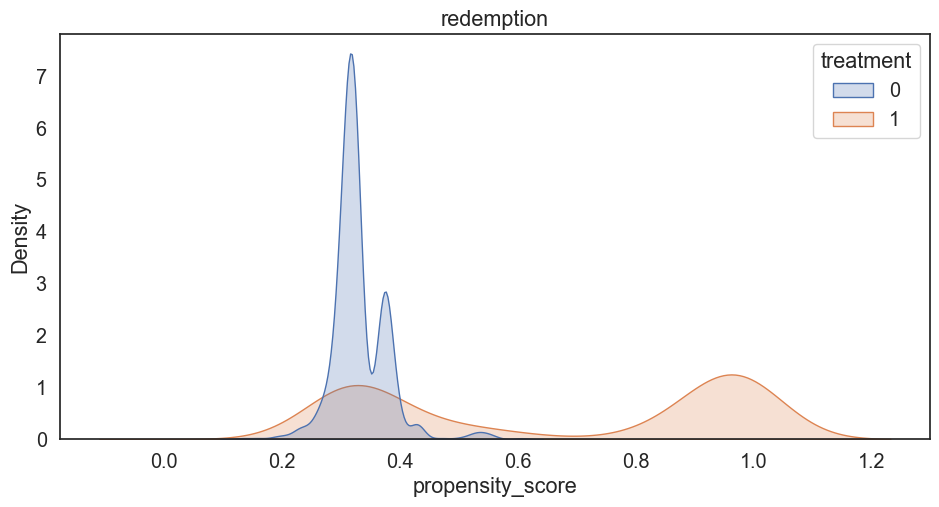

In [201]:
sns.kdeplot(data=psm.predicted_data, x='propensity_score', hue='treatment', fill=True)
plt.title('redemption');

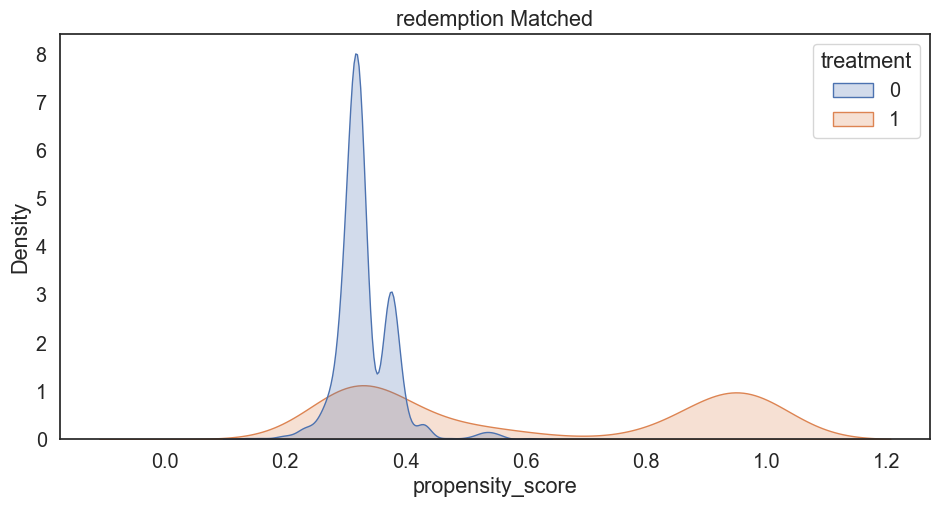

In [202]:
sns.kdeplot(data=psm.df_matched, x='propensity_score', hue='treatment', fill=True)
plt.title('redemption Matched');

## DoWhy

In [109]:
df_Latam_clean2 = df_Latam_clean[(df_Latam_clean['grupo'] == 'control') | (df_Latam_clean['grupo'] == 'recommender')]
df_Latam_clean2['treatment'] = np.nan
df_Latam_clean2

grupo  learning_group_flg  open_date  open_flag click_date  \
0       recommender                   0 2023-06-12          1        NaT   
1       recommender                   0 2023-06-05          1        NaT   
2       recommender                   0        NaT          0        NaT   
3       recommender                   0        NaT          0        NaT   
4       recommender                   0 2023-06-06          1        NaT   
...             ...                 ...        ...        ...        ...   
209886  recommender                   0        NaT          0        NaT   
209887  recommender                   0 2023-06-05          1        NaT   
209888  recommender                   0        NaT          0        NaT   
209889  recommender                   0 2023-06-06          1        NaT   
209890  recommender                   0        NaT          0        NaT   

        click_flag product  post_open_flag  post_click_flag  \
0                0     NaN             NaN              NaN   
1                0     NaN             NaN              NaN   
2                0     NaN             NaN              NaN   
3                0     NaN             NaN              NaN   
4                0     NaN             NaN              NaN   
...            ...     ...             ...              ...   
209886           0     NaN             NaN              NaN   
209887           0     ALF             1.0              0.0   
209888           0     NaN             NaN              NaN   
209889           0     NaN             NaN              NaN   
209890           0     NaN             NaN              NaN   

        post_conversion_flag  post_n_trx  post_USD  post_income_amt  \
0                        NaN         NaN       NaN              NaN   
1                        NaN         NaN       NaN              NaN   
2                        NaN         NaN       NaN              NaN   
3                        NaN         NaN       NaN              NaN   
4                        NaN         NaN       NaN              NaN   
...                      ...         ...       ...              ...   
209886                   NaN         NaN       NaN              NaN   
209887                   1.0         1.0  149.2263         149.2263   
209888                   NaN         NaN       NaN              NaN   
209889                   NaN         NaN       NaN              NaN   
209890                   NaN         NaN       NaN              NaN   

        post_puntos_LTM  pre_open_flag  pre_click_flag  pre_conversion_flag  \
0                   NaN            NaN             NaN                  NaN   
1                   NaN            NaN             NaN                  NaN   
2                   NaN            NaN             NaN                  NaN   
3                   NaN            NaN             NaN                  NaN   
4                   NaN            NaN             NaN                  NaN   
...                 ...            ...             ...                  ...   
209886              NaN            NaN             NaN                  NaN   
209887          23000.0            1.0             0.0                  1.0   
209888              NaN            NaN             NaN                  NaN   
209889              NaN            NaN             NaN                  NaN   
209890              NaN            NaN             NaN                  NaN   

        pre_n_trx  pre_USD  pre_income_amt  pre_puntos_LTM  treatment  
0             NaN      NaN             NaN             NaN        NaN  
1             NaN      NaN             NaN             NaN        NaN  
2             NaN      NaN             NaN             NaN        NaN  
3             NaN      NaN             NaN             NaN        NaN  
4             NaN      NaN             NaN             NaN        NaN  
...           ...      ...             ...             ...        ...  
209886        NaN      NaN            

In [110]:
for i in range(0, len(df_Latam_clean2)):
    if df_Latam_clean2['grupo'].iloc[i] == 'control':
        df_Latam_clean2['treatment'].iloc[i] = False
        
    elif df_Latam_clean2['grupo'].iloc[i] == 'recommender':
        df_Latam_clean2['treatment'].iloc[i] = True
        
df_Latam_clean2

grupo  learning_group_flg  open_date  open_flag click_date  \
0       recommender                   0 2023-06-12          1        NaT   
1       recommender                   0 2023-06-05          1        NaT   
2       recommender                   0        NaT          0        NaT   
3       recommender                   0        NaT          0        NaT   
4       recommender                   0 2023-06-06          1        NaT   
...             ...                 ...        ...        ...        ...   
209886  recommender                   0        NaT          0        NaT   
209887  recommender                   0 2023-06-05          1        NaT   
209888  recommender                   0        NaT          0        NaT   
209889  recommender                   0 2023-06-06          1        NaT   
209890  recommender                   0        NaT          0        NaT   

        click_flag product  post_open_flag  post_click_flag  \
0                0     NaN             NaN              NaN   
1                0     NaN             NaN              NaN   
2                0     NaN             NaN              NaN   
3                0     NaN             NaN              NaN   
4                0     NaN             NaN              NaN   
...            ...     ...             ...              ...   
209886           0     NaN             NaN              NaN   
209887           0     ALF             1.0              0.0   
209888           0     NaN             NaN              NaN   
209889           0     NaN             NaN              NaN   
209890           0     NaN             NaN              NaN   

        post_conversion_flag  post_n_trx  post_USD  post_income_amt  \
0                        NaN         NaN       NaN              NaN   
1                        NaN         NaN       NaN              NaN   
2                        NaN         NaN       NaN              NaN   
3                        NaN         NaN       NaN              NaN   
4                        NaN         NaN       NaN              NaN   
...                      ...         ...       ...              ...   
209886                   NaN         NaN       NaN              NaN   
209887                   1.0         1.0  149.2263         149.2263   
209888                   NaN         NaN       NaN              NaN   
209889                   NaN         NaN       NaN              NaN   
209890                   NaN         NaN       NaN              NaN   

        post_puntos_LTM  pre_open_flag  pre_click_flag  pre_conversion_flag  \
0                   NaN            NaN             NaN                  NaN   
1                   NaN            NaN             NaN                  NaN   
2                   NaN            NaN             NaN                  NaN   
3                   NaN            NaN             NaN                  NaN   
4                   NaN            NaN             NaN                  NaN   
...                 ...            ...             ...                  ...   
209886              NaN            NaN             NaN                  NaN   
209887          23000.0            1.0             0.0                  1.0   
209888              NaN            NaN             NaN                  NaN   
209889              NaN            NaN             NaN                  NaN   
209890              NaN            NaN             NaN                  NaN   

        pre_n_trx  pre_USD  pre_income_amt  pre_puntos_LTM treatment  
0             NaN      NaN             NaN             NaN      True  
1             NaN      NaN             NaN             NaN      True  
2             NaN      NaN             NaN             NaN      True  
3             NaN      NaN             NaN             NaN      True  
4             NaN      NaN             NaN             NaN      True  
...           ...      ...             ...             ...       ...  
209886        NaN      NaN             NaN   

In [111]:
df_Latam_clean2.groupby(['learning_group_flg', 'treatment'])['post_USD'].mean()

learning_group_flg  treatment
0                   False        250.146387
                    True         373.443429
1                   False        389.293236
                    True         113.704992
Name: post_USD, dtype: float64

In [112]:
df_Latam[['grupo', 'post_conversion_flag']].value_counts()

grupo        post_conversion_flag
recommender  0                       117367
accrual      0                        58300
recommender  1                        14731
redemption   0                         7702
control      0                         6415
accrual      1                         3662
redemption   1                          919
control      1                          795
dtype: int64

In [113]:
df_Latam[df_Latam['grupo']== 'control'].pre_USD.value_counts()

0.000000      410
87.548127      29
437.740637     22
875.481275      6
48.078135       4
             ... 
211.853952      1
949.468107      1
0.482589        1
58.328370       1
91.235685       1
Name: pre_USD, Length: 314, dtype: int64

In [114]:
df_Latam[df_Latam['grupo']== 'control'].pre_USD.describe()

count      795.000000
mean       458.042643
std       1489.643625
min          0.000000
25%          0.000000
50%          0.000000
75%        302.773991
max      21186.664704
Name: pre_USD, dtype: float64

In [115]:
# Compute naive estimate 
treatment_avg = df_Latam_clean2.query('treatment==1')['post_USD'].mean()
cntrl_avg = df_Latam_clean2.query('treatment==0')['post_USD'].mean()

treatment_avg - cntrl_avg

In [116]:
nodes = ['treatment', 'post_conversion_flag', 'learning_group_flg']
edges = [
 ('treatment', 'post_conversion_flag'),
 ('learning_group_flg', 'treatment'),
 ('learning_group_flg', 'post_conversion_flag')
]

In [117]:
gml_string = 'graph [directed 1\n'
for node in nodes:
 gml_string += f'\tnode [id "{node}" label "{node}"]\n'
for edge in edges:
 gml_string += f'\tedge [source "{edge[0]}" target "{edge[1]}"]\n'
gml_string += ']'

In [118]:
df_Latam_clean2.post_conversion_flag.replace({1:True, 0:False})

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
209886     NaN
209887    True
209888     NaN
209889     NaN
209890     NaN
Name: post_conversion_flag, Length: 139308, dtype: object

In [119]:
df_Latam_clean3 = df_Latam_clean2.post_conversion_flag.replace({1:True, 0:False})

In [120]:
model = CausalModel(
    data=df_Latam_clean3,
    treatment='treatment',
    outcome='post_conversion_flag',
    graph=gml_string
)

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(estimand)

In [ ]:
# Identify effect
estimand = model.identify_effect()

# Get estimate (IPW weighting)
estimate = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.propensity_score_weighting',
    target_units='ate'
)

print(estimate.value)